# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = '/data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
# Note: because of a version problem with matplot lib, the following line of code doesn't work in this workspace.
# pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

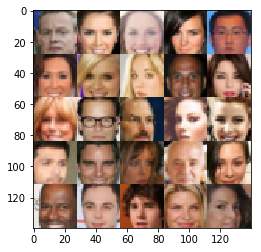

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    #!pip install -U matplotlib==2.2.2
    # TODO: Implement Function
    real_input =  tf.placeholder(tf.float32,[None,image_width,image_height,image_channels])
    z_input = tf.placeholder(tf.float32,[None,z_dim])
    learning_rate = tf.placeholder(tf.float32)
    return (real_input,z_input,learning_rate)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

In [7]:
### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

SyntaxError: invalid syntax (<ipython-input-7-9de9ae1fce59>, line 2)

In [8]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    alpha = 0.0001
    
    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 64, 5, strides = 2, padding='same')
        relul = tf.maximum(alpha * x1,x1)
        
        x2 = tf.layers.conv2d(relul, 128, 5, strides = 2, padding='same')
        bn_x2 = tf.layers.batch_normalization(x2, training = True)
        relul2 = tf.maximum(alpha * bn_x2, bn_x2)
        
        x3 = tf.layers.conv2d(relul2, 256, 5, strides = 2, padding = 'same')
        bn_x3 = tf.layers.batch_normalization(x3, training = True)
        relul3 = tf.maximum(alpha * bn_x3, bn_x3)
        
        flatten = tf.reshape(relul3, (-1, 4 * 4 * 256))
        logits = tf.layers.dense(flatten,1)
        out = tf.sigmoid(logits)
        
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [9]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.0001
    
    with tf.variable_scope('generator', reuse = not is_train):
        x1 = tf.layers.dense(z, 7 * 7 * 256)
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training = is_train)
        x1 = tf.maximum(alpha * x1, x1)
        print(x1)
 
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides = 2, padding = 'same')
        x2 = tf.layers.batch_normalization(x2, training = is_train)
        x2 = tf.maximum(alpha * x2, x2)
        print(x2)
        
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides = 2, padding = 'same')
        print(logits)
        
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tensor("Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("conv2d_transpose_2/BiasAdd:0", shape=(?, 28, 28, 5), dtype=float32)
Tensor("Maximum_2:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("Maximum_3:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("conv2d_transpose_4/BiasAdd:0", shape=(?, 28, 28, 5), dtype=float32)
Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [10]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    smooth = 0.1
    g_model = generator(input_z,out_channel_dim,is_train=True)
    d_model_real,d_model_real_logits = discriminator(input_real,reuse=False)
    d_model_fake,d_model_fake_logits = discriminator(g_model,reuse=True)
    

    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_model_real_logits,
                                                                         labels=tf.ones_like(d_model_real_logits) *(1-smooth)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_model_fake_logits,
                                                                        labels=tf.zeros_like(d_model_fake_logits)))
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_model_fake_logits,
                                                                   labels=tf.ones_like(d_model_fake_logits)))
    return (d_loss,g_loss)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tensor("generator/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator/conv2d_transpose_2/BiasAdd:0", shape=(?, 28, 28, 4), dtype=float32)
Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [11]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list= d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(g_loss, var_list = g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [13]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
      # TODO: Build Model
    
    _,image_width,image_height,image_channels = data_shape
    
    # getting placeholders
    input_real,input_z,lr = model_inputs(image_width,image_height,image_channels,z_dim)
    
    # getting losses
    d_loss,g_loss = model_loss(input_real,input_z,image_channels)
    
    # Getting optimizers
    d_opt,g_opt = model_opt(d_loss,g_loss,lr,beta1)
    
    step = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                step += 1
                batch_images *= 2
                batch_z = np.random.uniform(-1,1,(batch_size,z_dim))
                _ = sess.run(d_opt,feed_dict={input_real:batch_images,
                                             input_z:batch_z,
                                             lr:learning_rate})
                
                _ = sess.run(g_opt,feed_dict={input_real:batch_images,
                                             input_z:batch_z,
                                             lr:learning_rate})
                
                if step == 1:
                    print('initial output')
                    show_generator_output(sess,25,input_z,image_channels,data_image_mode)
                if step % 10 == 0:
                    train_loss_d = sess.run(d_loss,feed_dict={input_real:batch_images,
                                                    input_z:batch_z,
                                                    lr:learning_rate})
                    train_loss_g = sess.run(g_loss,feed_dict={input_real:batch_images,
                                                    input_z:batch_z,
                                                    lr:learning_rate})
                    print('Epochs {},batches {}, dis_loss {} , gen_loss {}'.format(epoch_i+1,step,train_loss_d,train_loss_g))
                if step%100 == 0:
                    show_generator_output(sess,25,input_z,image_channels,data_image_mode)
      #  saver.save(sess, './generator.ckpt')
                
                
                
                
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Tensor("generator/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator/conv2d_transpose_2/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)
initial output
Tensor("generator_1/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_1/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_1/conv2d_transpose_2/BiasAdd:0", shape=(?, 28, 28, 1), dtype=float32)


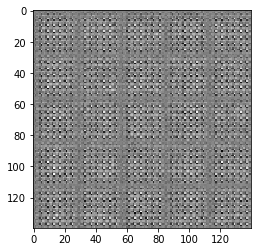

Epochs 1,batches 10, dis_loss 0.715658962726593 , gen_loss 12.938607215881348
Epochs 1,batches 20, dis_loss 2.867892026901245 , gen_loss 0.10223448276519775
Epochs 1,batches 30, dis_loss 0.923602283000946 , gen_loss 1.7342052459716797
Epochs 1,batches 40, dis_loss 1.6990776062011719 , gen_loss 0.6527928113937378
Epochs 1,batches 50, dis_loss 1.207032322883606 , gen_loss 0.8399996757507324
Epochs 1,batches 60, dis_loss 1.492093801498413 , gen_loss 2.364034652709961
Epochs 1,batches 70, dis_loss 1.7855932712554932 , gen_loss 1.5791988372802734
Epochs 1,batches 80, dis_loss 1.333063006401062 , gen_loss 1.496023416519165
Epochs 1,batches 90, dis_loss 2.3524274826049805 , gen_loss 0.18383291363716125
Epochs 1,batches 100, dis_loss 1.8380823135375977 , gen_loss 0.32019755244255066
Tensor("generator_2/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_2/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_2/conv2d_transpose_2/BiasAdd:0", shape=(?, 28, 28, 1),

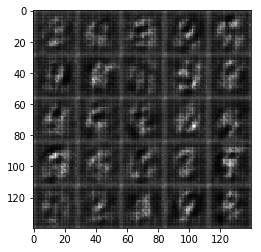

Epochs 1,batches 110, dis_loss 1.5576995611190796 , gen_loss 0.37722450494766235
Epochs 1,batches 120, dis_loss 1.3977822065353394 , gen_loss 0.6704977750778198
Epochs 1,batches 130, dis_loss 1.0809111595153809 , gen_loss 1.4078142642974854
Epochs 1,batches 140, dis_loss 1.2447121143341064 , gen_loss 1.124820351600647
Epochs 1,batches 150, dis_loss 1.2757896184921265 , gen_loss 1.0675283670425415
Epochs 1,batches 160, dis_loss 2.132389545440674 , gen_loss 0.22067034244537354
Epochs 1,batches 170, dis_loss 2.174490451812744 , gen_loss 0.1905418187379837
Epochs 1,batches 180, dis_loss 1.3635672330856323 , gen_loss 0.5943322777748108
Epochs 1,batches 190, dis_loss 2.4179723262786865 , gen_loss 0.16612158715724945
Epochs 1,batches 200, dis_loss 1.471785545349121 , gen_loss 0.4819257855415344
Tensor("generator_3/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_3/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_3/conv2d_transpose_2/BiasAdd:0", shape=(?

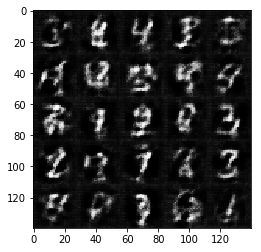

Epochs 1,batches 210, dis_loss 0.8929200172424316 , gen_loss 1.1950559616088867
Epochs 1,batches 220, dis_loss 2.1039438247680664 , gen_loss 0.2209913432598114
Epochs 1,batches 230, dis_loss 1.3796781301498413 , gen_loss 2.5048723220825195
Epochs 1,batches 240, dis_loss 1.771635890007019 , gen_loss 0.3564247488975525
Epochs 1,batches 250, dis_loss 1.4524343013763428 , gen_loss 0.6547342538833618
Epochs 1,batches 260, dis_loss 1.2152721881866455 , gen_loss 0.6500643491744995
Epochs 1,batches 270, dis_loss 1.8420677185058594 , gen_loss 3.166682004928589
Epochs 1,batches 280, dis_loss 2.0433225631713867 , gen_loss 0.303891122341156
Epochs 1,batches 290, dis_loss 1.4365918636322021 , gen_loss 0.48495787382125854
Epochs 1,batches 300, dis_loss 1.2457363605499268 , gen_loss 1.8983745574951172
Tensor("generator_4/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_4/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_4/conv2d_transpose_2/BiasAdd:0", shape=(?,

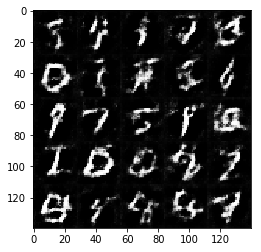

Epochs 1,batches 310, dis_loss 1.180619716644287 , gen_loss 1.2060017585754395
Epochs 1,batches 320, dis_loss 1.8981988430023193 , gen_loss 0.29932811856269836
Epochs 1,batches 330, dis_loss 1.2195109128952026 , gen_loss 0.6749930381774902
Epochs 1,batches 340, dis_loss 1.6542248725891113 , gen_loss 0.3986802399158478
Epochs 1,batches 350, dis_loss 1.6047759056091309 , gen_loss 0.4057244062423706
Epochs 1,batches 360, dis_loss 1.1347644329071045 , gen_loss 1.1043572425842285
Epochs 1,batches 370, dis_loss 1.2280042171478271 , gen_loss 0.7009851932525635
Epochs 1,batches 380, dis_loss 2.2765722274780273 , gen_loss 0.1877625435590744
Epochs 1,batches 390, dis_loss 1.2224879264831543 , gen_loss 2.268688201904297
Epochs 1,batches 400, dis_loss 1.1796092987060547 , gen_loss 0.6589232087135315
Tensor("generator_5/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_5/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_5/conv2d_transpose_2/BiasAdd:0", shape=(?

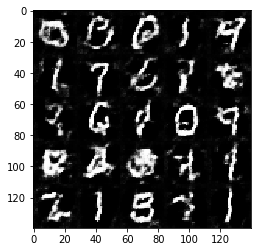

Epochs 1,batches 410, dis_loss 0.8615534901618958 , gen_loss 1.2358394861221313
Epochs 1,batches 420, dis_loss 1.6623811721801758 , gen_loss 0.4374192953109741
Epochs 1,batches 430, dis_loss 2.1180264949798584 , gen_loss 0.22628796100616455
Epochs 1,batches 440, dis_loss 2.01458740234375 , gen_loss 0.26759105920791626
Epochs 1,batches 450, dis_loss 2.805117607116699 , gen_loss 0.10666566342115402
Epochs 1,batches 460, dis_loss 0.7838354110717773 , gen_loss 1.8208681344985962
Epochs 1,batches 470, dis_loss 0.8483829498291016 , gen_loss 1.3895623683929443
Epochs 1,batches 480, dis_loss 1.5829157829284668 , gen_loss 0.44060617685317993
Epochs 1,batches 490, dis_loss 0.9427911043167114 , gen_loss 1.0357646942138672
Epochs 1,batches 500, dis_loss 0.9857954382896423 , gen_loss 2.0816900730133057
Tensor("generator_6/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_6/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_6/conv2d_transpose_2/BiasAdd:0", shape=

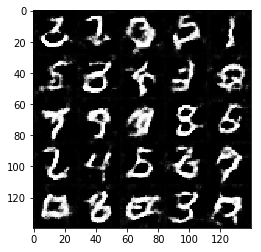

Epochs 1,batches 510, dis_loss 1.1742403507232666 , gen_loss 0.7419898509979248
Epochs 1,batches 520, dis_loss 1.0627832412719727 , gen_loss 1.1904065608978271
Epochs 1,batches 530, dis_loss 1.0725148916244507 , gen_loss 1.426969289779663
Epochs 1,batches 540, dis_loss 1.5589404106140137 , gen_loss 0.4502969980239868
Epochs 1,batches 550, dis_loss 0.8684704303741455 , gen_loss 1.5644015073776245
Epochs 1,batches 560, dis_loss 1.925015926361084 , gen_loss 0.3452933430671692
Epochs 1,batches 570, dis_loss 1.5503325462341309 , gen_loss 0.3971189856529236
Epochs 1,batches 580, dis_loss 1.7620126008987427 , gen_loss 0.3146393597126007
Epochs 1,batches 590, dis_loss 1.0876060724258423 , gen_loss 1.2706940174102783
Epochs 1,batches 600, dis_loss 1.0162312984466553 , gen_loss 1.7595548629760742
Tensor("generator_7/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_7/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_7/conv2d_transpose_2/BiasAdd:0", shape=(?,

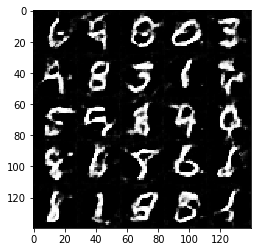

Epochs 1,batches 610, dis_loss 2.133756637573242 , gen_loss 0.24220043420791626
Epochs 1,batches 620, dis_loss 1.240652084350586 , gen_loss 0.6800557374954224
Epochs 1,batches 630, dis_loss 1.9738528728485107 , gen_loss 0.2740103006362915
Epochs 1,batches 640, dis_loss 0.9382627010345459 , gen_loss 0.9960712790489197
Epochs 1,batches 650, dis_loss 1.660007357597351 , gen_loss 0.41538864374160767
Epochs 1,batches 660, dis_loss 1.6312358379364014 , gen_loss 0.3688056766986847
Epochs 1,batches 670, dis_loss 1.928359866142273 , gen_loss 0.3596895933151245
Epochs 1,batches 680, dis_loss 0.8435566425323486 , gen_loss 1.289363145828247
Epochs 1,batches 690, dis_loss 1.0022286176681519 , gen_loss 0.9432116746902466
Epochs 1,batches 700, dis_loss 0.9966564774513245 , gen_loss 1.7691795825958252
Tensor("generator_8/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_8/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_8/conv2d_transpose_2/BiasAdd:0", shape=(?, 

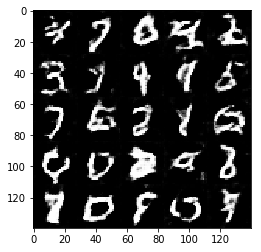

Epochs 1,batches 710, dis_loss 1.0624183416366577 , gen_loss 0.8576620817184448
Epochs 1,batches 720, dis_loss 0.9957979321479797 , gen_loss 1.239198088645935
Epochs 1,batches 730, dis_loss 1.2649644613265991 , gen_loss 0.6797759532928467
Epochs 1,batches 740, dis_loss 1.2662980556488037 , gen_loss 0.5803343057632446
Epochs 1,batches 750, dis_loss 0.9783986210823059 , gen_loss 2.6460418701171875
Epochs 1,batches 760, dis_loss 0.8792588114738464 , gen_loss 1.4392201900482178
Epochs 1,batches 770, dis_loss 1.0380419492721558 , gen_loss 0.8368186950683594
Epochs 1,batches 780, dis_loss 0.7522392868995667 , gen_loss 1.2235679626464844
Epochs 1,batches 790, dis_loss 1.3538792133331299 , gen_loss 0.5850300788879395
Epochs 1,batches 800, dis_loss 1.213471531867981 , gen_loss 2.3362536430358887
Tensor("generator_9/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_9/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_9/conv2d_transpose_2/BiasAdd:0", shape=(?,

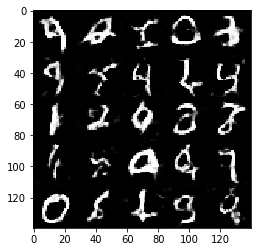

Epochs 1,batches 810, dis_loss 1.7421269416809082 , gen_loss 0.3726658821105957
Epochs 1,batches 820, dis_loss 0.7831712961196899 , gen_loss 1.9121805429458618
Epochs 1,batches 830, dis_loss 0.9460383653640747 , gen_loss 2.8707387447357178
Epochs 1,batches 840, dis_loss 2.385516405105591 , gen_loss 0.2121741771697998
Epochs 1,batches 850, dis_loss 0.9445293545722961 , gen_loss 0.9871008992195129
Epochs 1,batches 860, dis_loss 1.7202484607696533 , gen_loss 0.38928279280662537
Epochs 1,batches 870, dis_loss 0.724543571472168 , gen_loss 1.2173693180084229
Epochs 1,batches 880, dis_loss 2.0118021965026855 , gen_loss 0.29541850090026855
Epochs 1,batches 890, dis_loss 1.0825656652450562 , gen_loss 0.7368642091751099
Epochs 1,batches 900, dis_loss 0.8364273905754089 , gen_loss 1.275195598602295
Tensor("generator_10/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_10/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_10/conv2d_transpose_2/BiasAdd:0", shape

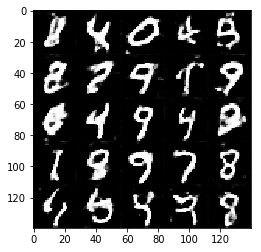

Epochs 1,batches 910, dis_loss 1.1907145977020264 , gen_loss 0.7671167254447937
Epochs 1,batches 920, dis_loss 0.9078109860420227 , gen_loss 1.1567615270614624
Epochs 1,batches 930, dis_loss 1.274951696395874 , gen_loss 0.5925809741020203
Epochs 1,batches 940, dis_loss 1.8197606801986694 , gen_loss 0.35957783460617065
Epochs 1,batches 950, dis_loss 1.1340441703796387 , gen_loss 1.153271198272705
Epochs 1,batches 960, dis_loss 1.1451877355575562 , gen_loss 0.913886547088623
Epochs 1,batches 970, dis_loss 1.0805838108062744 , gen_loss 0.7484230995178223
Epochs 1,batches 980, dis_loss 1.072188377380371 , gen_loss 2.2597591876983643
Epochs 1,batches 990, dis_loss 1.2267417907714844 , gen_loss 0.5816363096237183
Epochs 1,batches 1000, dis_loss 1.1901949644088745 , gen_loss 1.166334629058838
Tensor("generator_11/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_11/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_11/conv2d_transpose_2/BiasAdd:0", shape=(

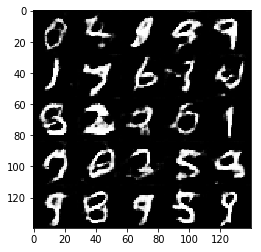

Epochs 1,batches 1010, dis_loss 1.886366367340088 , gen_loss 0.37002119421958923
Epochs 1,batches 1020, dis_loss 0.9597530364990234 , gen_loss 0.9877094030380249
Epochs 1,batches 1030, dis_loss 1.0478497743606567 , gen_loss 1.7629523277282715
Epochs 1,batches 1040, dis_loss 1.0853947401046753 , gen_loss 1.3691086769104004
Epochs 1,batches 1050, dis_loss 0.9394991993904114 , gen_loss 1.565516710281372
Epochs 1,batches 1060, dis_loss 0.6953436732292175 , gen_loss 1.3775684833526611
Epochs 1,batches 1070, dis_loss 0.9608455896377563 , gen_loss 0.9567845463752747
Epochs 1,batches 1080, dis_loss 1.151422381401062 , gen_loss 0.8071244955062866
Epochs 1,batches 1090, dis_loss 0.93084716796875 , gen_loss 1.1035419702529907
Epochs 1,batches 1100, dis_loss 0.9593828916549683 , gen_loss 1.0223942995071411
Tensor("generator_12/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_12/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_12/conv2d_transpose_2/BiasAdd:0"

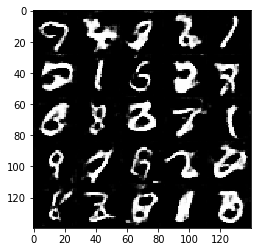

Epochs 1,batches 1110, dis_loss 0.967963695526123 , gen_loss 1.0549349784851074
Epochs 1,batches 1120, dis_loss 1.464229702949524 , gen_loss 0.5217838287353516
Epochs 1,batches 1130, dis_loss 0.9217727184295654 , gen_loss 1.1320650577545166
Epochs 1,batches 1140, dis_loss 0.8372325897216797 , gen_loss 1.0831286907196045
Epochs 1,batches 1150, dis_loss 1.2324464321136475 , gen_loss 0.608950138092041
Epochs 1,batches 1160, dis_loss 0.770250678062439 , gen_loss 1.5357675552368164
Epochs 1,batches 1170, dis_loss 0.7975337505340576 , gen_loss 1.1248377561569214
Epochs 1,batches 1180, dis_loss 0.8570406436920166 , gen_loss 1.0783343315124512
Epochs 1,batches 1190, dis_loss 2.0300889015197754 , gen_loss 0.258700966835022
Epochs 1,batches 1200, dis_loss 1.355625867843628 , gen_loss 0.5743219256401062
Tensor("generator_13/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_13/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_13/conv2d_transpose_2/BiasAdd:0", 

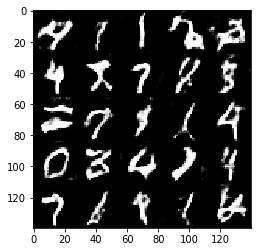

Epochs 1,batches 1210, dis_loss 1.1352156400680542 , gen_loss 0.8165452480316162
Epochs 1,batches 1220, dis_loss 0.8426259160041809 , gen_loss 1.132847785949707
Epochs 1,batches 1230, dis_loss 1.7536320686340332 , gen_loss 0.44691264629364014
Epochs 1,batches 1240, dis_loss 1.4194140434265137 , gen_loss 0.6470232009887695
Epochs 1,batches 1250, dis_loss 1.3617509603500366 , gen_loss 2.55888032913208
Epochs 1,batches 1260, dis_loss 1.3352439403533936 , gen_loss 0.6081909537315369
Epochs 1,batches 1270, dis_loss 0.829145610332489 , gen_loss 1.1584454774856567
Epochs 1,batches 1280, dis_loss 1.1110804080963135 , gen_loss 0.9252412915229797
Epochs 1,batches 1290, dis_loss 2.7395987510681152 , gen_loss 0.17176827788352966
Epochs 1,batches 1300, dis_loss 1.1006605625152588 , gen_loss 0.7055379152297974
Tensor("generator_14/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_14/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_14/conv2d_transpose_2/BiasAdd:

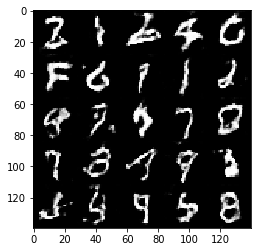

Epochs 1,batches 1310, dis_loss 1.2291839122772217 , gen_loss 0.6002415418624878
Epochs 1,batches 1320, dis_loss 0.919688880443573 , gen_loss 1.0703938007354736
Epochs 1,batches 1330, dis_loss 0.9642759561538696 , gen_loss 2.2757012844085693
Epochs 1,batches 1340, dis_loss 1.2446857690811157 , gen_loss 0.6281628608703613
Epochs 1,batches 1350, dis_loss 0.9529197216033936 , gen_loss 0.9787064790725708
Epochs 1,batches 1360, dis_loss 0.803006112575531 , gen_loss 1.2862160205841064
Epochs 1,batches 1370, dis_loss 3.1659488677978516 , gen_loss 0.11956875771284103
Epochs 1,batches 1380, dis_loss 1.4198603630065918 , gen_loss 0.5766363143920898
Epochs 1,batches 1390, dis_loss 1.6787863969802856 , gen_loss 0.560064435005188
Epochs 1,batches 1400, dis_loss 0.8589860200881958 , gen_loss 1.113450050354004
Tensor("generator_15/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_15/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_15/conv2d_transpose_2/BiasAdd:0

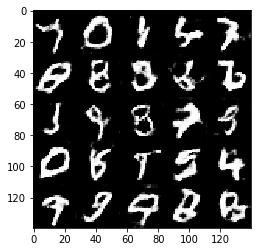

Epochs 1,batches 1410, dis_loss 1.0088061094284058 , gen_loss 0.8869411945343018
Epochs 1,batches 1420, dis_loss 0.9825444221496582 , gen_loss 0.8747480511665344
Epochs 1,batches 1430, dis_loss 1.3537908792495728 , gen_loss 0.7004406452178955
Epochs 1,batches 1440, dis_loss 2.259047508239746 , gen_loss 0.2181045413017273
Epochs 1,batches 1450, dis_loss 1.503597378730774 , gen_loss 0.47285422682762146
Epochs 1,batches 1460, dis_loss 1.2238109111785889 , gen_loss 0.5776242613792419
Epochs 1,batches 1470, dis_loss 1.568137288093567 , gen_loss 0.4668671786785126
Epochs 1,batches 1480, dis_loss 1.0040416717529297 , gen_loss 0.8556782007217407
Epochs 1,batches 1490, dis_loss 0.8970611095428467 , gen_loss 1.0908747911453247
Epochs 1,batches 1500, dis_loss 1.1174122095108032 , gen_loss 0.757860004901886
Tensor("generator_16/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_16/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_16/conv2d_transpose_2/BiasAdd:0

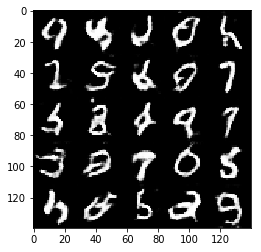

Epochs 1,batches 1510, dis_loss 2.0208544731140137 , gen_loss 0.3568587899208069
Epochs 1,batches 1520, dis_loss 1.3803573846817017 , gen_loss 0.6216831207275391
Epochs 1,batches 1530, dis_loss 1.550722360610962 , gen_loss 0.4842182397842407
Epochs 1,batches 1540, dis_loss 0.9423273205757141 , gen_loss 0.9355950355529785
Epochs 1,batches 1550, dis_loss 0.9049621224403381 , gen_loss 0.9981604218482971
Epochs 1,batches 1560, dis_loss 1.835996389389038 , gen_loss 0.35983729362487793
Epochs 1,batches 1570, dis_loss 0.7471442222595215 , gen_loss 2.2325313091278076
Epochs 1,batches 1580, dis_loss 0.6162302494049072 , gen_loss 1.81718111038208
Epochs 1,batches 1590, dis_loss 2.3405723571777344 , gen_loss 0.25737735629081726
Epochs 1,batches 1600, dis_loss 1.0190447568893433 , gen_loss 0.8726892471313477
Tensor("generator_17/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_17/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_17/conv2d_transpose_2/BiasAdd:

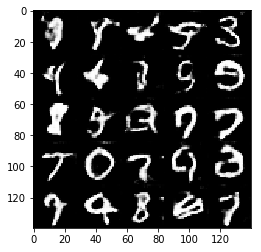

Epochs 1,batches 1610, dis_loss 0.7913590669631958 , gen_loss 2.200212001800537
Epochs 1,batches 1620, dis_loss 0.7521648406982422 , gen_loss 1.2306195497512817
Epochs 1,batches 1630, dis_loss 1.482593297958374 , gen_loss 0.5890228748321533
Epochs 1,batches 1640, dis_loss 0.8222876787185669 , gen_loss 1.2495378255844116
Epochs 1,batches 1650, dis_loss 0.7453761100769043 , gen_loss 1.733944296836853
Epochs 1,batches 1660, dis_loss 1.107263207435608 , gen_loss 0.7709828615188599
Epochs 1,batches 1670, dis_loss 0.5517754554748535 , gen_loss 1.809828281402588
Epochs 1,batches 1680, dis_loss 1.7819390296936035 , gen_loss 0.36452776193618774
Epochs 1,batches 1690, dis_loss 1.6605961322784424 , gen_loss 0.43146640062332153
Epochs 1,batches 1700, dis_loss 1.167586088180542 , gen_loss 0.6504602432250977
Tensor("generator_18/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_18/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_18/conv2d_transpose_2/BiasAdd:0"

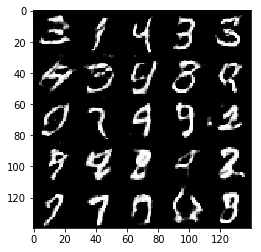

Epochs 1,batches 1710, dis_loss 0.7312420010566711 , gen_loss 1.5051159858703613
Epochs 1,batches 1720, dis_loss 1.069812297821045 , gen_loss 0.9039502143859863
Epochs 1,batches 1730, dis_loss 0.722319483757019 , gen_loss 1.5410852432250977
Epochs 1,batches 1740, dis_loss 0.8203554153442383 , gen_loss 1.1364073753356934
Epochs 1,batches 1750, dis_loss 0.8956644535064697 , gen_loss 1.089505672454834
Epochs 1,batches 1760, dis_loss 0.7142723798751831 , gen_loss 2.25458025932312
Epochs 1,batches 1770, dis_loss 0.8479763269424438 , gen_loss 1.1971803903579712
Epochs 1,batches 1780, dis_loss 0.9042485952377319 , gen_loss 1.1215801239013672
Epochs 1,batches 1790, dis_loss 1.0053662061691284 , gen_loss 1.0479037761688232
Epochs 1,batches 1800, dis_loss 2.161181926727295 , gen_loss 0.2981378734111786
Tensor("generator_19/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_19/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_19/conv2d_transpose_2/BiasAdd:0", 

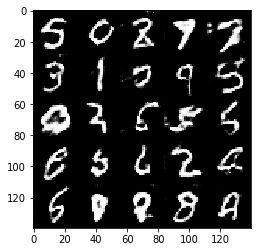

Epochs 1,batches 1810, dis_loss 0.6606079339981079 , gen_loss 1.5124999284744263
Epochs 1,batches 1820, dis_loss 1.8476486206054688 , gen_loss 0.3849925398826599
Epochs 1,batches 1830, dis_loss 1.0325449705123901 , gen_loss 0.8939214944839478
Epochs 1,batches 1840, dis_loss 1.36881422996521 , gen_loss 0.7006412744522095
Epochs 1,batches 1850, dis_loss 1.3167582750320435 , gen_loss 0.6468093395233154
Epochs 1,batches 1860, dis_loss 0.9255989789962769 , gen_loss 1.0076277256011963
Epochs 1,batches 1870, dis_loss 1.8829612731933594 , gen_loss 0.3915090560913086
Epochs 1,batches 1880, dis_loss 0.9683391451835632 , gen_loss 1.0370479822158813
Epochs 1,batches 1890, dis_loss 0.8593554496765137 , gen_loss 1.0441718101501465
Epochs 1,batches 1900, dis_loss 0.9260622262954712 , gen_loss 1.2343854904174805
Tensor("generator_20/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_20/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_20/conv2d_transpose_2/BiasAdd:

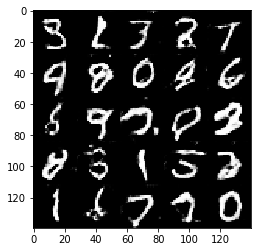

Epochs 1,batches 1910, dis_loss 0.9122294187545776 , gen_loss 1.108656406402588
Epochs 1,batches 1920, dis_loss 1.1498106718063354 , gen_loss 0.681901216506958
Epochs 1,batches 1930, dis_loss 0.7206345200538635 , gen_loss 1.5254199504852295
Epochs 1,batches 1940, dis_loss 0.7362627983093262 , gen_loss 1.341886043548584
Epochs 1,batches 1950, dis_loss 0.8096147775650024 , gen_loss 1.6177104711532593
Epochs 1,batches 1960, dis_loss 0.649063229560852 , gen_loss 1.6982686519622803
Epochs 1,batches 1970, dis_loss 0.6111091375350952 , gen_loss 1.7768346071243286
Epochs 1,batches 1980, dis_loss 0.62132328748703 , gen_loss 2.053992509841919
Epochs 1,batches 1990, dis_loss 0.7600241899490356 , gen_loss 1.4183003902435303
Epochs 1,batches 2000, dis_loss 0.6819175481796265 , gen_loss 1.4421931505203247
Tensor("generator_21/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_21/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_21/conv2d_transpose_2/BiasAdd:0", s

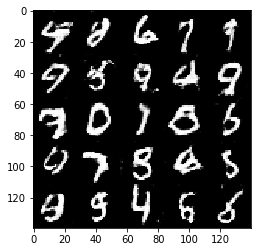

Epochs 1,batches 2010, dis_loss 1.9185670614242554 , gen_loss 0.31846722960472107
Epochs 1,batches 2020, dis_loss 0.8809128403663635 , gen_loss 1.0848486423492432
Epochs 1,batches 2030, dis_loss 1.1387156248092651 , gen_loss 2.956639289855957
Epochs 1,batches 2040, dis_loss 0.581293523311615 , gen_loss 2.0792675018310547
Epochs 1,batches 2050, dis_loss 0.5319480895996094 , gen_loss 2.079223155975342
Epochs 1,batches 2060, dis_loss 0.7294245362281799 , gen_loss 2.286573648452759
Epochs 1,batches 2070, dis_loss 0.749613344669342 , gen_loss 1.458377718925476
Epochs 1,batches 2080, dis_loss 1.0608890056610107 , gen_loss 0.8269397020339966
Epochs 1,batches 2090, dis_loss 0.565117359161377 , gen_loss 2.5121476650238037
Epochs 1,batches 2100, dis_loss 1.154676914215088 , gen_loss 0.7478440999984741
Tensor("generator_22/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_22/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_22/conv2d_transpose_2/BiasAdd:0", s

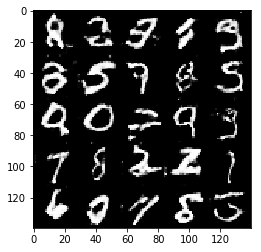

Epochs 1,batches 2110, dis_loss 2.661640167236328 , gen_loss 0.15913809835910797
Epochs 1,batches 2120, dis_loss 1.7146708965301514 , gen_loss 0.5339633226394653
Epochs 1,batches 2130, dis_loss 2.04002046585083 , gen_loss 0.26200899481773376
Epochs 1,batches 2140, dis_loss 0.8111939430236816 , gen_loss 1.2872564792633057
Epochs 1,batches 2150, dis_loss 1.7971196174621582 , gen_loss 0.4403955340385437
Epochs 1,batches 2160, dis_loss 0.7081916332244873 , gen_loss 1.4666972160339355
Epochs 1,batches 2170, dis_loss 1.1898167133331299 , gen_loss 0.8092566132545471
Epochs 1,batches 2180, dis_loss 1.5249409675598145 , gen_loss 0.47349369525909424
Epochs 1,batches 2190, dis_loss 0.7118954658508301 , gen_loss 1.7959520816802979
Epochs 1,batches 2200, dis_loss 0.7070609331130981 , gen_loss 1.93349027633667
Tensor("generator_23/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_23/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_23/conv2d_transpose_2/BiasAdd:

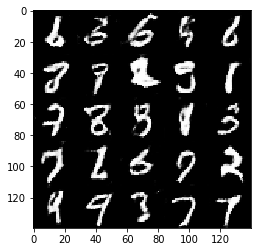

Epochs 1,batches 2210, dis_loss 0.8297094106674194 , gen_loss 1.2792723178863525
Epochs 1,batches 2220, dis_loss 1.096440315246582 , gen_loss 0.8628994226455688
Epochs 1,batches 2230, dis_loss 0.8739457130432129 , gen_loss 1.1361453533172607
Epochs 1,batches 2240, dis_loss 0.6412425637245178 , gen_loss 1.6848927736282349
Epochs 1,batches 2250, dis_loss 0.736632227897644 , gen_loss 1.3434193134307861
Epochs 1,batches 2260, dis_loss 1.041163682937622 , gen_loss 1.3312687873840332
Epochs 1,batches 2270, dis_loss 1.03826105594635 , gen_loss 2.8479151725769043
Epochs 1,batches 2280, dis_loss 0.7327700257301331 , gen_loss 1.4055395126342773
Epochs 1,batches 2290, dis_loss 2.2506933212280273 , gen_loss 0.23114070296287537
Epochs 1,batches 2300, dis_loss 1.414637804031372 , gen_loss 0.9514943957328796
Tensor("generator_24/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_24/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_24/conv2d_transpose_2/BiasAdd:0",

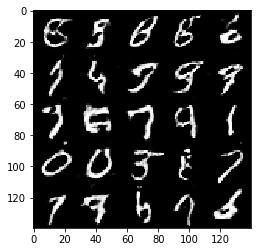

Epochs 1,batches 2310, dis_loss 1.0568894147872925 , gen_loss 0.9414421319961548
Epochs 1,batches 2320, dis_loss 1.0077440738677979 , gen_loss 0.9071526527404785
Epochs 1,batches 2330, dis_loss 2.211592435836792 , gen_loss 0.2560615837574005
Epochs 1,batches 2340, dis_loss 0.6660824418067932 , gen_loss 1.5141289234161377
Epochs 1,batches 2350, dis_loss 0.8369076251983643 , gen_loss 2.3081650733947754
Epochs 1,batches 2360, dis_loss 2.4729695320129395 , gen_loss 4.95405387878418
Epochs 1,batches 2370, dis_loss 0.9295661449432373 , gen_loss 1.1006231307983398
Epochs 1,batches 2380, dis_loss 0.9111316204071045 , gen_loss 1.0330373048782349
Epochs 1,batches 2390, dis_loss 1.5268741846084595 , gen_loss 0.5207889080047607
Epochs 1,batches 2400, dis_loss 0.7995243072509766 , gen_loss 1.3928130865097046
Tensor("generator_25/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_25/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_25/conv2d_transpose_2/BiasAdd:0

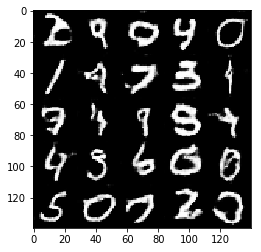

Epochs 1,batches 2410, dis_loss 1.0983333587646484 , gen_loss 0.7737674713134766
Epochs 1,batches 2420, dis_loss 1.5282689332962036 , gen_loss 0.5851945281028748
Epochs 1,batches 2430, dis_loss 0.8813868165016174 , gen_loss 1.2119061946868896
Epochs 1,batches 2440, dis_loss 1.7769132852554321 , gen_loss 0.36771684885025024
Epochs 1,batches 2450, dis_loss 1.268235206604004 , gen_loss 0.6116554737091064
Epochs 1,batches 2460, dis_loss 1.0441677570343018 , gen_loss 0.883073627948761
Epochs 1,batches 2470, dis_loss 0.5897544622421265 , gen_loss 2.2245326042175293
Epochs 1,batches 2480, dis_loss 1.136703372001648 , gen_loss 0.7892829179763794
Epochs 1,batches 2490, dis_loss 1.151991367340088 , gen_loss 0.9272950291633606
Epochs 1,batches 2500, dis_loss 0.8020485043525696 , gen_loss 1.263697862625122
Tensor("generator_26/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_26/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_26/conv2d_transpose_2/BiasAdd:0"

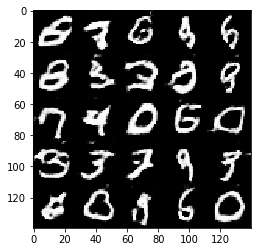

Epochs 1,batches 2510, dis_loss 0.7788429260253906 , gen_loss 1.8038017749786377
Epochs 1,batches 2520, dis_loss 1.9017419815063477 , gen_loss 0.34048449993133545
Epochs 1,batches 2530, dis_loss 1.0285440683364868 , gen_loss 0.8665975332260132
Epochs 1,batches 2540, dis_loss 1.1966661214828491 , gen_loss 0.7754653692245483
Epochs 1,batches 2550, dis_loss 0.5555658936500549 , gen_loss 2.2227911949157715
Epochs 1,batches 2560, dis_loss 1.2217284440994263 , gen_loss 0.7871153354644775
Epochs 1,batches 2570, dis_loss 1.1079998016357422 , gen_loss 0.7332080006599426
Epochs 1,batches 2580, dis_loss 0.7257485389709473 , gen_loss 1.5775659084320068
Epochs 1,batches 2590, dis_loss 0.6435807943344116 , gen_loss 1.841932773590088
Epochs 1,batches 2600, dis_loss 0.9411342144012451 , gen_loss 0.936732292175293
Tensor("generator_27/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_27/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_27/conv2d_transpose_2/BiasAdd

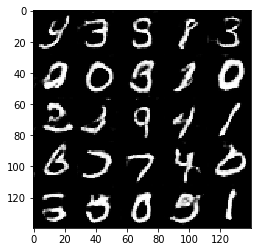

Epochs 1,batches 2610, dis_loss 0.7137863636016846 , gen_loss 1.4328982830047607
Epochs 1,batches 2620, dis_loss 2.1657307147979736 , gen_loss 0.2697215974330902
Epochs 1,batches 2630, dis_loss 1.5870352983474731 , gen_loss 0.5810145139694214
Epochs 1,batches 2640, dis_loss 0.8155121803283691 , gen_loss 1.6173908710479736
Epochs 1,batches 2650, dis_loss 0.7442927360534668 , gen_loss 1.3631718158721924
Epochs 1,batches 2660, dis_loss 1.1919305324554443 , gen_loss 0.6514720916748047
Epochs 1,batches 2670, dis_loss 1.204399585723877 , gen_loss 0.7696132659912109
Epochs 1,batches 2680, dis_loss 0.5153523683547974 , gen_loss 1.9904413223266602
Epochs 1,batches 2690, dis_loss 0.6924058794975281 , gen_loss 1.5010020732879639
Epochs 1,batches 2700, dis_loss 1.1445064544677734 , gen_loss 0.7341679334640503
Tensor("generator_28/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_28/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_28/conv2d_transpose_2/BiasAdd

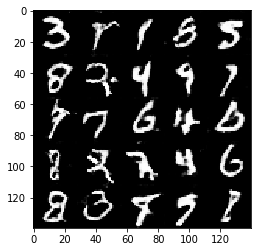

Epochs 1,batches 2710, dis_loss 1.3881852626800537 , gen_loss 0.6470134854316711
Epochs 1,batches 2720, dis_loss 1.4810341596603394 , gen_loss 3.8696963787078857
Epochs 1,batches 2730, dis_loss 0.8422260880470276 , gen_loss 1.818248987197876
Epochs 1,batches 2740, dis_loss 2.704041004180908 , gen_loss 0.21211636066436768
Epochs 1,batches 2750, dis_loss 0.5176758766174316 , gen_loss 2.024562358856201
Epochs 1,batches 2760, dis_loss 0.8797727823257446 , gen_loss 1.1230871677398682
Epochs 1,batches 2770, dis_loss 1.6214847564697266 , gen_loss 0.6723158359527588
Epochs 1,batches 2780, dis_loss 1.051866054534912 , gen_loss 0.9007534980773926
Epochs 1,batches 2790, dis_loss 0.9811605215072632 , gen_loss 0.8932451009750366
Epochs 1,batches 2800, dis_loss 0.8143243193626404 , gen_loss 1.5002270936965942
Tensor("generator_29/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_29/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_29/conv2d_transpose_2/BiasAdd:0

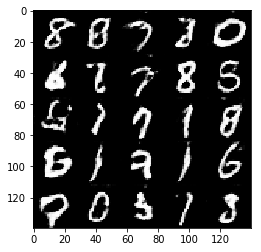

Epochs 1,batches 2810, dis_loss 0.7044322490692139 , gen_loss 1.4454433917999268
Epochs 1,batches 2820, dis_loss 1.1037248373031616 , gen_loss 0.785022497177124
Epochs 1,batches 2830, dis_loss 1.4710288047790527 , gen_loss 0.6114371418952942
Epochs 1,batches 2840, dis_loss 0.5714627504348755 , gen_loss 1.9467885494232178
Epochs 1,batches 2850, dis_loss 1.2303446531295776 , gen_loss 0.6731003522872925
Epochs 1,batches 2860, dis_loss 2.225076675415039 , gen_loss 0.22725364565849304
Epochs 1,batches 2870, dis_loss 1.3688011169433594 , gen_loss 0.5889889001846313
Epochs 1,batches 2880, dis_loss 0.7993287444114685 , gen_loss 1.183426856994629
Epochs 1,batches 2890, dis_loss 0.7119486331939697 , gen_loss 1.3853379487991333
Epochs 1,batches 2900, dis_loss 0.9707193970680237 , gen_loss 0.9723877310752869
Tensor("generator_30/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_30/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_30/conv2d_transpose_2/BiasAdd:

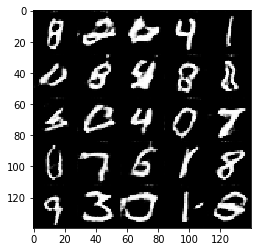

Epochs 1,batches 2910, dis_loss 0.652496337890625 , gen_loss 1.4488801956176758
Epochs 1,batches 2920, dis_loss 1.448102355003357 , gen_loss 0.5751254558563232
Epochs 1,batches 2930, dis_loss 0.9478516578674316 , gen_loss 0.9608958959579468
Epochs 1,batches 2940, dis_loss 1.580930233001709 , gen_loss 0.47402799129486084
Epochs 1,batches 2950, dis_loss 1.1097652912139893 , gen_loss 0.734855055809021
Epochs 1,batches 2960, dis_loss 1.005115270614624 , gen_loss 0.8741860389709473
Epochs 1,batches 2970, dis_loss 0.7572682499885559 , gen_loss 1.1512154340744019
Epochs 1,batches 2980, dis_loss 0.6701743006706238 , gen_loss 2.5687694549560547
Epochs 1,batches 2990, dis_loss 1.0029219388961792 , gen_loss 0.8582136631011963
Epochs 1,batches 3000, dis_loss 0.9074349403381348 , gen_loss 0.987545371055603
Tensor("generator_31/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_31/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_31/conv2d_transpose_2/BiasAdd:0",

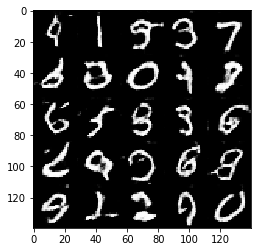

Epochs 1,batches 3010, dis_loss 0.8148943781852722 , gen_loss 1.3019084930419922
Epochs 1,batches 3020, dis_loss 0.7639179229736328 , gen_loss 1.3857769966125488
Epochs 1,batches 3030, dis_loss 1.577742338180542 , gen_loss 0.5599081516265869
Epochs 1,batches 3040, dis_loss 0.614404022693634 , gen_loss 1.7371619939804077
Epochs 1,batches 3050, dis_loss 1.1936664581298828 , gen_loss 0.7629772424697876
Epochs 1,batches 3060, dis_loss 1.0608729124069214 , gen_loss 1.0463337898254395
Epochs 1,batches 3070, dis_loss 1.0953598022460938 , gen_loss 2.5045199394226074
Epochs 1,batches 3080, dis_loss 1.2597112655639648 , gen_loss 0.6907146573066711
Epochs 1,batches 3090, dis_loss 1.1715397834777832 , gen_loss 0.9823269844055176
Epochs 1,batches 3100, dis_loss 0.6280361413955688 , gen_loss 1.774536371231079
Tensor("generator_32/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_32/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_32/conv2d_transpose_2/BiasAdd:0

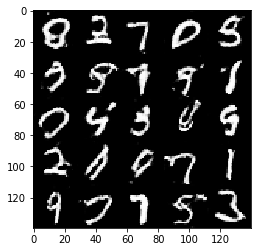

Epochs 1,batches 3110, dis_loss 0.970201849937439 , gen_loss 0.9528533220291138
Epochs 1,batches 3120, dis_loss 0.7901059985160828 , gen_loss 1.3115483522415161
Epochs 1,batches 3130, dis_loss 2.297001361846924 , gen_loss 0.35499653220176697
Epochs 1,batches 3140, dis_loss 0.6742042303085327 , gen_loss 1.5844919681549072
Epochs 1,batches 3150, dis_loss 1.324332594871521 , gen_loss 0.7076333165168762
Epochs 1,batches 3160, dis_loss 0.7032061815261841 , gen_loss 1.5305688381195068
Epochs 1,batches 3170, dis_loss 0.9043712615966797 , gen_loss 0.9779527187347412
Epochs 1,batches 3180, dis_loss 1.0568139553070068 , gen_loss 0.7649496793746948
Epochs 1,batches 3190, dis_loss 0.7249882221221924 , gen_loss 1.4686788320541382
Epochs 1,batches 3200, dis_loss 0.6595034003257751 , gen_loss 1.5701582431793213
Tensor("generator_33/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_33/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_33/conv2d_transpose_2/BiasAdd:

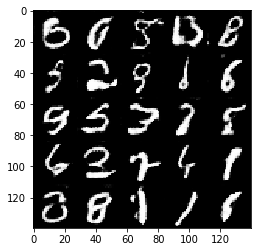

Epochs 1,batches 3210, dis_loss 1.6506786346435547 , gen_loss 0.4717063903808594
Epochs 1,batches 3220, dis_loss 1.253345251083374 , gen_loss 0.60419762134552
Epochs 1,batches 3230, dis_loss 0.7221542596817017 , gen_loss 1.4275163412094116
Epochs 1,batches 3240, dis_loss 0.9707939624786377 , gen_loss 1.0030481815338135
Epochs 1,batches 3250, dis_loss 0.9717986583709717 , gen_loss 0.9068124294281006
Epochs 1,batches 3260, dis_loss 1.202986717224121 , gen_loss 0.7276829481124878
Epochs 1,batches 3270, dis_loss 0.7625240087509155 , gen_loss 1.5916528701782227
Epochs 1,batches 3280, dis_loss 0.8333572149276733 , gen_loss 1.1636449098587036
Epochs 1,batches 3290, dis_loss 0.5710178017616272 , gen_loss 2.193293571472168
Epochs 1,batches 3300, dis_loss 0.6444669961929321 , gen_loss 1.5944952964782715
Tensor("generator_34/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_34/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_34/conv2d_transpose_2/BiasAdd:0",

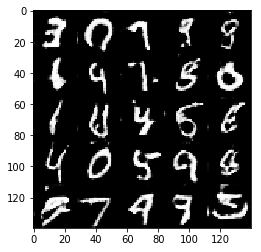

Epochs 1,batches 3310, dis_loss 0.7120250463485718 , gen_loss 1.3805232048034668
Epochs 1,batches 3320, dis_loss 0.4197998344898224 , gen_loss 3.354546070098877
Epochs 1,batches 3330, dis_loss 1.2293554544448853 , gen_loss 0.7686599493026733
Epochs 1,batches 3340, dis_loss 3.3589844703674316 , gen_loss 0.09806928038597107
Epochs 1,batches 3350, dis_loss 0.6568393707275391 , gen_loss 1.6192257404327393
Epochs 1,batches 3360, dis_loss 2.3897781372070312 , gen_loss 0.20501035451889038
Epochs 1,batches 3370, dis_loss 0.8837457895278931 , gen_loss 1.0908113718032837
Epochs 1,batches 3380, dis_loss 0.9105819463729858 , gen_loss 1.020682454109192
Epochs 1,batches 3390, dis_loss 0.9821881055831909 , gen_loss 0.9293056726455688
Epochs 1,batches 3400, dis_loss 0.662561297416687 , gen_loss 1.7338091135025024
Tensor("generator_35/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_35/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_35/conv2d_transpose_2/BiasAdd

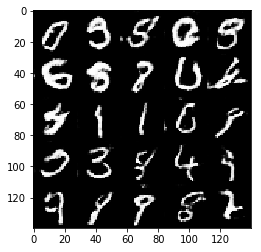

Epochs 1,batches 3410, dis_loss 0.5064350366592407 , gen_loss 2.1297779083251953
Epochs 1,batches 3420, dis_loss 0.8254308700561523 , gen_loss 1.2152912616729736
Epochs 1,batches 3430, dis_loss 0.966544508934021 , gen_loss 0.8562864661216736
Epochs 1,batches 3440, dis_loss 0.5440454483032227 , gen_loss 1.9427324533462524
Epochs 1,batches 3450, dis_loss 1.3633079528808594 , gen_loss 0.7950217723846436
Epochs 1,batches 3460, dis_loss 0.5446736812591553 , gen_loss 1.9531210660934448
Epochs 1,batches 3470, dis_loss 0.7311794757843018 , gen_loss 1.2333743572235107
Epochs 1,batches 3480, dis_loss 1.3067548274993896 , gen_loss 0.701311469078064
Epochs 1,batches 3490, dis_loss 0.5951906442642212 , gen_loss 2.3198013305664062
Epochs 1,batches 3500, dis_loss 0.689010500907898 , gen_loss 1.4606585502624512
Tensor("generator_36/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_36/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_36/conv2d_transpose_2/BiasAdd:0

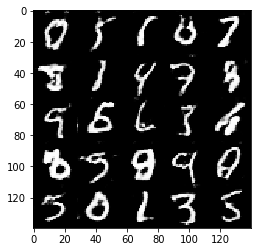

Epochs 1,batches 3510, dis_loss 0.7249237895011902 , gen_loss 1.251035451889038
Epochs 1,batches 3520, dis_loss 0.7309335470199585 , gen_loss 1.3079466819763184
Epochs 1,batches 3530, dis_loss 1.0124973058700562 , gen_loss 0.9658478498458862
Epochs 1,batches 3540, dis_loss 1.336615800857544 , gen_loss 0.6068469882011414
Epochs 1,batches 3550, dis_loss 1.1482843160629272 , gen_loss 0.8331172466278076
Epochs 1,batches 3560, dis_loss 1.1036978960037231 , gen_loss 0.7424869537353516
Epochs 1,batches 3570, dis_loss 0.5857846736907959 , gen_loss 1.8645774126052856
Epochs 1,batches 3580, dis_loss 0.7249031066894531 , gen_loss 1.5550457239151
Epochs 1,batches 3590, dis_loss 0.7282229661941528 , gen_loss 1.4131312370300293
Epochs 1,batches 3600, dis_loss 0.7940275073051453 , gen_loss 2.6109352111816406
Tensor("generator_37/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_37/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_37/conv2d_transpose_2/BiasAdd:0",

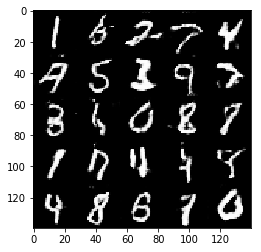

Epochs 1,batches 3610, dis_loss 1.668806552886963 , gen_loss 0.7395695447921753
Epochs 1,batches 3620, dis_loss 2.0444495677948 , gen_loss 0.2454392910003662
Epochs 1,batches 3630, dis_loss 0.6026638746261597 , gen_loss 2.0861525535583496
Epochs 1,batches 3640, dis_loss 0.6301347017288208 , gen_loss 1.8169357776641846
Epochs 1,batches 3650, dis_loss 0.9483538269996643 , gen_loss 0.9846446514129639
Epochs 1,batches 3660, dis_loss 0.660306453704834 , gen_loss 1.6802464723587036
Epochs 1,batches 3670, dis_loss 0.84361732006073 , gen_loss 1.6385477781295776
Epochs 1,batches 3680, dis_loss 0.5744343996047974 , gen_loss 1.715325951576233
Epochs 1,batches 3690, dis_loss 0.9283264875411987 , gen_loss 0.9296703934669495
Epochs 1,batches 3700, dis_loss 0.6401230096817017 , gen_loss 1.5721662044525146
Tensor("generator_38/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_38/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_38/conv2d_transpose_2/BiasAdd:0", sh

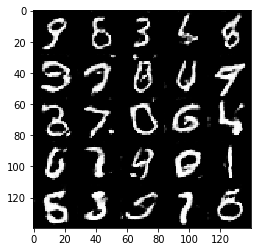

Epochs 1,batches 3710, dis_loss 0.6317213177680969 , gen_loss 1.7480113506317139
Epochs 1,batches 3720, dis_loss 0.6572876572608948 , gen_loss 1.717310905456543
Epochs 1,batches 3730, dis_loss 0.8965640068054199 , gen_loss 1.0319747924804688
Epochs 1,batches 3740, dis_loss 0.6067534685134888 , gen_loss 1.8423092365264893
Epochs 1,batches 3750, dis_loss 0.7693008184432983 , gen_loss 1.2089424133300781
Epochs 2,batches 3760, dis_loss 0.7753827571868896 , gen_loss 1.2599860429763794
Epochs 2,batches 3770, dis_loss 0.5953629016876221 , gen_loss 1.8220187425613403
Epochs 2,batches 3780, dis_loss 0.8693627119064331 , gen_loss 1.0279626846313477
Epochs 2,batches 3790, dis_loss 0.6742761135101318 , gen_loss 1.7669364213943481
Epochs 2,batches 3800, dis_loss 0.5068366527557373 , gen_loss 2.071260452270508
Tensor("generator_39/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_39/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_39/conv2d_transpose_2/BiasAdd:

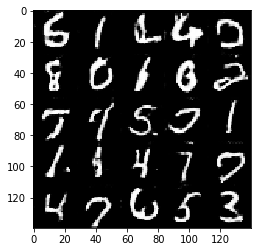

Epochs 2,batches 3810, dis_loss 1.0513088703155518 , gen_loss 1.0100393295288086
Epochs 2,batches 3820, dis_loss 0.5249349474906921 , gen_loss 2.3012123107910156
Epochs 2,batches 3830, dis_loss 0.43181049823760986 , gen_loss 2.749868631362915
Epochs 2,batches 3840, dis_loss 7.0688910484313965 , gen_loss 10.921147346496582
Epochs 2,batches 3850, dis_loss 1.3837966918945312 , gen_loss 0.7318301200866699
Epochs 2,batches 3860, dis_loss 1.2392396926879883 , gen_loss 2.9121193885803223
Epochs 2,batches 3870, dis_loss 0.6031478047370911 , gen_loss 2.2801432609558105
Epochs 2,batches 3880, dis_loss 0.8201203942298889 , gen_loss 1.822424054145813
Epochs 2,batches 3890, dis_loss 0.6593834161758423 , gen_loss 1.6000317335128784
Epochs 2,batches 3900, dis_loss 0.6705095171928406 , gen_loss 1.5180145502090454
Tensor("generator_40/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_40/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_40/conv2d_transpose_2/BiasAdd

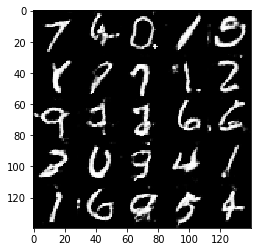

Epochs 2,batches 3910, dis_loss 1.3769264221191406 , gen_loss 0.5936749577522278
Epochs 2,batches 3920, dis_loss 0.5244167447090149 , gen_loss 1.9567805528640747
Epochs 2,batches 3930, dis_loss 0.7848421931266785 , gen_loss 1.5645527839660645
Epochs 2,batches 3940, dis_loss 1.4941625595092773 , gen_loss 0.5172557234764099
Epochs 2,batches 3950, dis_loss 0.6568782329559326 , gen_loss 1.4511480331420898
Epochs 2,batches 3960, dis_loss 1.038804531097412 , gen_loss 0.916135847568512
Epochs 2,batches 3970, dis_loss 0.8562222719192505 , gen_loss 1.0416491031646729
Epochs 2,batches 3980, dis_loss 0.6145877838134766 , gen_loss 1.67844820022583
Epochs 2,batches 3990, dis_loss 1.722407341003418 , gen_loss 0.48670777678489685
Epochs 2,batches 4000, dis_loss 0.5990625023841858 , gen_loss 2.069695472717285
Tensor("generator_41/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_41/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_41/conv2d_transpose_2/BiasAdd:0",

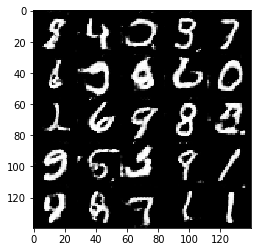

Epochs 2,batches 4010, dis_loss 0.9109628200531006 , gen_loss 1.120681881904602
Epochs 2,batches 4020, dis_loss 1.0232856273651123 , gen_loss 4.985395431518555
Epochs 2,batches 4030, dis_loss 0.9858188033103943 , gen_loss 0.9821854829788208
Epochs 2,batches 4040, dis_loss 0.775637149810791 , gen_loss 1.3161256313323975
Epochs 2,batches 4050, dis_loss 1.1628310680389404 , gen_loss 0.6352357864379883
Epochs 2,batches 4060, dis_loss 1.9774136543273926 , gen_loss 0.34953176975250244
Epochs 2,batches 4070, dis_loss 0.858435332775116 , gen_loss 1.2816741466522217
Epochs 2,batches 4080, dis_loss 0.5987156629562378 , gen_loss 1.8387672901153564
Epochs 2,batches 4090, dis_loss 1.7628240585327148 , gen_loss 0.3598993420600891
Epochs 2,batches 4100, dis_loss 1.196352481842041 , gen_loss 0.6306947469711304
Tensor("generator_42/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_42/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_42/conv2d_transpose_2/BiasAdd:0"

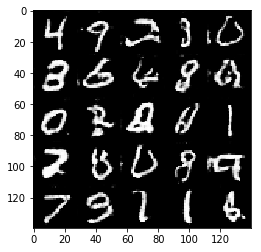

Epochs 2,batches 4110, dis_loss 0.6381778120994568 , gen_loss 1.6490845680236816
Epochs 2,batches 4120, dis_loss 0.6220657229423523 , gen_loss 2.156708240509033
Epochs 2,batches 4130, dis_loss 2.1551942825317383 , gen_loss 0.3193436861038208
Epochs 2,batches 4140, dis_loss 1.1408071517944336 , gen_loss 0.8504320979118347
Epochs 2,batches 4150, dis_loss 1.1158432960510254 , gen_loss 0.7639700174331665
Epochs 2,batches 4160, dis_loss 0.5293170809745789 , gen_loss 2.2189648151397705
Epochs 2,batches 4170, dis_loss 1.0395712852478027 , gen_loss 0.7931475043296814
Epochs 2,batches 4180, dis_loss 2.0444083213806152 , gen_loss 0.45646411180496216
Epochs 2,batches 4190, dis_loss 1.8243634700775146 , gen_loss 0.4108952283859253
Epochs 2,batches 4200, dis_loss 0.7515556216239929 , gen_loss 1.2670924663543701
Tensor("generator_43/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_43/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_43/conv2d_transpose_2/BiasAd

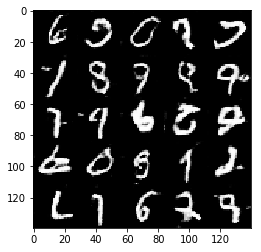

Epochs 2,batches 4210, dis_loss 0.5555458068847656 , gen_loss 2.1453332901000977
Epochs 2,batches 4220, dis_loss 0.5764639973640442 , gen_loss 1.8768634796142578
Epochs 2,batches 4230, dis_loss 2.6143088340759277 , gen_loss 0.211065411567688
Epochs 2,batches 4240, dis_loss 0.5745457410812378 , gen_loss 1.7281432151794434
Epochs 2,batches 4250, dis_loss 2.1104462146759033 , gen_loss 0.27349692583084106
Epochs 2,batches 4260, dis_loss 1.4136003255844116 , gen_loss 0.6037800312042236
Epochs 2,batches 4270, dis_loss 0.655157208442688 , gen_loss 1.4750096797943115
Epochs 2,batches 4280, dis_loss 0.6809262633323669 , gen_loss 2.0219736099243164
Epochs 2,batches 4290, dis_loss 0.6991807222366333 , gen_loss 1.4453325271606445
Epochs 2,batches 4300, dis_loss 0.6323853135108948 , gen_loss 1.70895516872406
Tensor("generator_44/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_44/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_44/conv2d_transpose_2/BiasAdd:0

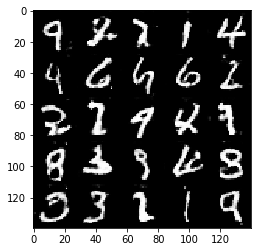

Epochs 2,batches 4310, dis_loss 0.8742074370384216 , gen_loss 1.069541096687317
Epochs 2,batches 4320, dis_loss 0.48872190713882446 , gen_loss 2.3030426502227783
Epochs 2,batches 4330, dis_loss 0.8942972421646118 , gen_loss 1.1472387313842773
Epochs 2,batches 4340, dis_loss 0.7370430827140808 , gen_loss 1.8020665645599365
Epochs 2,batches 4350, dis_loss 1.2852245569229126 , gen_loss 0.663619875907898
Epochs 2,batches 4360, dis_loss 1.1547129154205322 , gen_loss 0.9259033203125
Epochs 2,batches 4370, dis_loss 0.6309298872947693 , gen_loss 1.583356499671936
Epochs 2,batches 4380, dis_loss 1.0111262798309326 , gen_loss 2.4137580394744873
Epochs 2,batches 4390, dis_loss 2.1002063751220703 , gen_loss 0.3663463294506073
Epochs 2,batches 4400, dis_loss 1.2773244380950928 , gen_loss 0.6200843453407288
Tensor("generator_45/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_45/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_45/conv2d_transpose_2/BiasAdd:0",

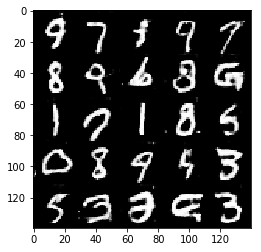

Epochs 2,batches 4410, dis_loss 1.7051050662994385 , gen_loss 0.4718210995197296
Epochs 2,batches 4420, dis_loss 1.8029992580413818 , gen_loss 0.409809410572052
Epochs 2,batches 4430, dis_loss 1.0274690389633179 , gen_loss 3.082031726837158
Epochs 2,batches 4440, dis_loss 0.5144397020339966 , gen_loss 2.1242332458496094
Epochs 2,batches 4450, dis_loss 1.9057135581970215 , gen_loss 0.34817689657211304
Epochs 2,batches 4460, dis_loss 0.7325932383537292 , gen_loss 1.4071489572525024
Epochs 2,batches 4470, dis_loss 0.896233081817627 , gen_loss 1.161893367767334
Epochs 2,batches 4480, dis_loss 0.7160772085189819 , gen_loss 2.032078742980957
Epochs 2,batches 4490, dis_loss 0.6526691317558289 , gen_loss 1.6091723442077637
Epochs 2,batches 4500, dis_loss 0.6483837366104126 , gen_loss 1.580876111984253
Tensor("generator_46/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_46/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_46/conv2d_transpose_2/BiasAdd:0",

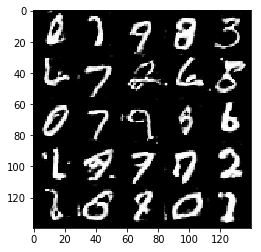

Epochs 2,batches 4510, dis_loss 0.5277340412139893 , gen_loss 1.996366262435913
Epochs 2,batches 4520, dis_loss 0.5850783586502075 , gen_loss 1.7199867963790894
Epochs 2,batches 4530, dis_loss 0.7038542628288269 , gen_loss 1.3506414890289307
Epochs 2,batches 4540, dis_loss 0.9145416021347046 , gen_loss 1.2656645774841309
Epochs 2,batches 4550, dis_loss 0.5705099701881409 , gen_loss 1.7662153244018555
Epochs 2,batches 4560, dis_loss 1.2702821493148804 , gen_loss 0.6164125204086304
Epochs 2,batches 4570, dis_loss 0.5145386457443237 , gen_loss 2.125807046890259
Epochs 2,batches 4580, dis_loss 0.49991467595100403 , gen_loss 2.1969404220581055
Epochs 2,batches 4590, dis_loss 2.297865867614746 , gen_loss 0.29705119132995605
Epochs 2,batches 4600, dis_loss 0.9639099836349487 , gen_loss 0.8857529163360596
Tensor("generator_47/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_47/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_47/conv2d_transpose_2/BiasAdd

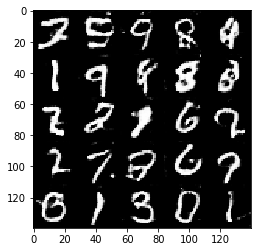

Epochs 2,batches 4610, dis_loss 0.6625421643257141 , gen_loss 1.6473355293273926
Epochs 2,batches 4620, dis_loss 0.9715167880058289 , gen_loss 1.1896015405654907
Epochs 2,batches 4630, dis_loss 1.7145862579345703 , gen_loss 0.37573546171188354
Epochs 2,batches 4640, dis_loss 0.8142359852790833 , gen_loss 1.2119786739349365
Epochs 2,batches 4650, dis_loss 0.49589529633522034 , gen_loss 2.664722442626953
Epochs 2,batches 4660, dis_loss 0.6586723327636719 , gen_loss 2.4762988090515137
Epochs 2,batches 4670, dis_loss 1.1969032287597656 , gen_loss 0.8547272682189941
Epochs 2,batches 4680, dis_loss 0.8164756298065186 , gen_loss 1.187469482421875
Epochs 2,batches 4690, dis_loss 0.7535338401794434 , gen_loss 1.6537822484970093
Epochs 2,batches 4700, dis_loss 1.9619231224060059 , gen_loss 0.4447813034057617
Tensor("generator_48/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_48/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_48/conv2d_transpose_2/BiasAd

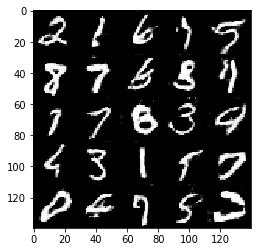

Epochs 2,batches 4710, dis_loss 0.5185695886611938 , gen_loss 2.001056432723999
Epochs 2,batches 4720, dis_loss 0.7435811758041382 , gen_loss 1.4794220924377441
Epochs 2,batches 4730, dis_loss 0.7079306840896606 , gen_loss 1.4066108465194702
Epochs 2,batches 4740, dis_loss 0.4889037013053894 , gen_loss 2.5797533988952637
Epochs 2,batches 4750, dis_loss 2.300676107406616 , gen_loss 0.2645609974861145
Epochs 2,batches 4760, dis_loss 0.7185905575752258 , gen_loss 1.6961883306503296
Epochs 2,batches 4770, dis_loss 0.5484017133712769 , gen_loss 1.9922977685928345
Epochs 2,batches 4780, dis_loss 0.7192233204841614 , gen_loss 1.3861572742462158
Epochs 2,batches 4790, dis_loss 0.5887142419815063 , gen_loss 1.6512641906738281
Epochs 2,batches 4800, dis_loss 0.6096230745315552 , gen_loss 1.6662118434906006
Tensor("generator_49/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_49/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_49/conv2d_transpose_2/BiasAdd:

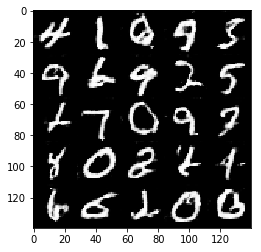

Epochs 2,batches 4810, dis_loss 0.8183814287185669 , gen_loss 1.5105987787246704
Epochs 2,batches 4820, dis_loss 0.626918375492096 , gen_loss 1.7104954719543457
Epochs 2,batches 4830, dis_loss 1.3544740676879883 , gen_loss 0.7033915519714355
Epochs 2,batches 4840, dis_loss 0.5339667797088623 , gen_loss 2.0393495559692383
Epochs 2,batches 4850, dis_loss 1.156295895576477 , gen_loss 0.7970501184463501
Epochs 2,batches 4860, dis_loss 0.6247158646583557 , gen_loss 1.788943886756897
Epochs 2,batches 4870, dis_loss 0.5630287528038025 , gen_loss 2.5438060760498047
Epochs 2,batches 4880, dis_loss 0.9082138538360596 , gen_loss 1.0759038925170898
Epochs 2,batches 4890, dis_loss 1.4626113176345825 , gen_loss 0.5662161707878113
Epochs 2,batches 4900, dis_loss 1.0857106447219849 , gen_loss 1.0591931343078613
Tensor("generator_50/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_50/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_50/conv2d_transpose_2/BiasAdd:0

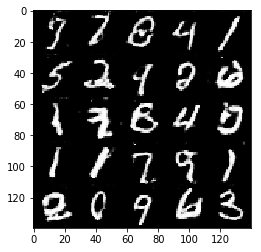

Epochs 2,batches 4910, dis_loss 0.5218933820724487 , gen_loss 2.1556925773620605
Epochs 2,batches 4920, dis_loss 0.5290892124176025 , gen_loss 2.207350254058838
Epochs 2,batches 4930, dis_loss 0.9597218036651611 , gen_loss 0.8852626085281372
Epochs 2,batches 4940, dis_loss 0.8472743034362793 , gen_loss 1.062280535697937
Epochs 2,batches 4950, dis_loss 2.1303725242614746 , gen_loss 0.2889096736907959
Epochs 2,batches 4960, dis_loss 1.8783090114593506 , gen_loss 0.4015450179576874
Epochs 2,batches 4970, dis_loss 0.8903460502624512 , gen_loss 0.9509313702583313
Epochs 2,batches 4980, dis_loss 2.8981375694274902 , gen_loss 0.12173701077699661
Epochs 2,batches 4990, dis_loss 0.7856431603431702 , gen_loss 1.6078453063964844
Epochs 2,batches 5000, dis_loss 0.8668370246887207 , gen_loss 1.0842907428741455
Tensor("generator_51/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_51/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_51/conv2d_transpose_2/BiasAdd

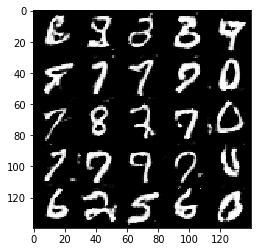

Epochs 2,batches 5010, dis_loss 0.7576256990432739 , gen_loss 1.511038064956665
Epochs 2,batches 5020, dis_loss 0.8223932981491089 , gen_loss 1.2451906204223633
Epochs 2,batches 5030, dis_loss 0.6943410634994507 , gen_loss 1.5351731777191162
Epochs 2,batches 5040, dis_loss 1.2023016214370728 , gen_loss 0.8067002296447754
Epochs 2,batches 5050, dis_loss 2.5464296340942383 , gen_loss 0.2061503529548645
Epochs 2,batches 5060, dis_loss 0.5718103051185608 , gen_loss 2.194821357727051
Epochs 2,batches 5070, dis_loss 0.45646896958351135 , gen_loss 2.5177180767059326
Epochs 2,batches 5080, dis_loss 1.0041764974594116 , gen_loss 1.1787211894989014
Epochs 2,batches 5090, dis_loss 0.9447996616363525 , gen_loss 1.208827257156372
Epochs 2,batches 5100, dis_loss 0.5035684108734131 , gen_loss 2.148383855819702
Tensor("generator_52/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_52/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_52/conv2d_transpose_2/BiasAdd:0

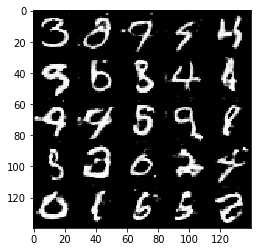

Epochs 2,batches 5110, dis_loss 0.7587339878082275 , gen_loss 1.4940963983535767
Epochs 2,batches 5120, dis_loss 2.680649757385254 , gen_loss 0.18675699830055237
Epochs 2,batches 5130, dis_loss 0.9244213104248047 , gen_loss 1.102649211883545
Epochs 2,batches 5140, dis_loss 0.5798105001449585 , gen_loss 1.9314786195755005
Epochs 2,batches 5150, dis_loss 0.42885175347328186 , gen_loss 2.867969512939453
Epochs 2,batches 5160, dis_loss 1.0800813436508179 , gen_loss 0.7984573841094971
Epochs 2,batches 5170, dis_loss 0.6204671263694763 , gen_loss 1.9673079252243042
Epochs 2,batches 5180, dis_loss 0.4502783715724945 , gen_loss 2.4195101261138916
Epochs 2,batches 5190, dis_loss 0.76522296667099 , gen_loss 1.3515270948410034
Epochs 2,batches 5200, dis_loss 0.5819737911224365 , gen_loss 1.850824236869812
Tensor("generator_53/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_53/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_53/conv2d_transpose_2/BiasAdd:0"

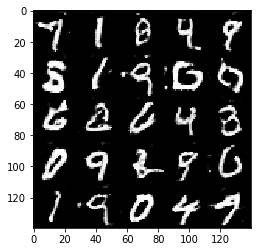

Epochs 2,batches 5210, dis_loss 0.777601957321167 , gen_loss 1.4774788618087769
Epochs 2,batches 5220, dis_loss 0.9698541760444641 , gen_loss 1.0020931959152222
Epochs 2,batches 5230, dis_loss 0.5922163724899292 , gen_loss 1.755165934562683
Epochs 2,batches 5240, dis_loss 0.7363840341567993 , gen_loss 1.4085983037948608
Epochs 2,batches 5250, dis_loss 0.6756368279457092 , gen_loss 1.4945411682128906
Epochs 2,batches 5260, dis_loss 1.5621140003204346 , gen_loss 0.6384847164154053
Epochs 2,batches 5270, dis_loss 1.0597903728485107 , gen_loss 0.8650252223014832
Epochs 2,batches 5280, dis_loss 0.7739369869232178 , gen_loss 1.4763288497924805
Epochs 2,batches 5290, dis_loss 1.4293451309204102 , gen_loss 0.6654661893844604
Epochs 2,batches 5300, dis_loss 0.8070992827415466 , gen_loss 1.1287274360656738
Tensor("generator_54/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_54/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_54/conv2d_transpose_2/BiasAdd:

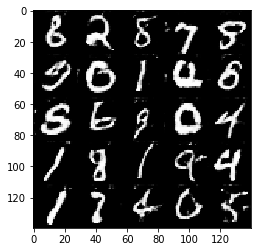

Epochs 2,batches 5310, dis_loss 0.5433032512664795 , gen_loss 1.9231467247009277
Epochs 2,batches 5320, dis_loss 0.726653516292572 , gen_loss 1.4153413772583008
Epochs 2,batches 5330, dis_loss 0.6033486127853394 , gen_loss 1.8164267539978027
Epochs 2,batches 5340, dis_loss 2.306811809539795 , gen_loss 0.26330018043518066
Epochs 2,batches 5350, dis_loss 2.458454132080078 , gen_loss 0.2321234941482544
Epochs 2,batches 5360, dis_loss 0.7016421556472778 , gen_loss 1.5732712745666504
Epochs 2,batches 5370, dis_loss 0.4803597629070282 , gen_loss 2.4430274963378906
Epochs 2,batches 5380, dis_loss 1.1251730918884277 , gen_loss 0.8261001110076904
Epochs 2,batches 5390, dis_loss 1.165104627609253 , gen_loss 0.7912105321884155
Epochs 2,batches 5400, dis_loss 0.7321984767913818 , gen_loss 1.266364336013794
Tensor("generator_55/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_55/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_55/conv2d_transpose_2/BiasAdd:0"

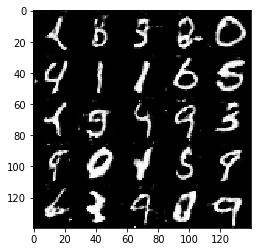

Epochs 2,batches 5410, dis_loss 0.5732606649398804 , gen_loss 1.7979211807250977
Epochs 2,batches 5420, dis_loss 0.47790464758872986 , gen_loss 2.488621711730957
Epochs 2,batches 5430, dis_loss 0.5464144349098206 , gen_loss 2.174717664718628
Epochs 2,batches 5440, dis_loss 2.750398874282837 , gen_loss 0.15379104018211365
Epochs 2,batches 5450, dis_loss 0.5687417984008789 , gen_loss 2.145447015762329
Epochs 2,batches 5460, dis_loss 0.46383678913116455 , gen_loss 2.5687177181243896
Epochs 2,batches 5470, dis_loss 1.0921666622161865 , gen_loss 0.8172942996025085
Epochs 2,batches 5480, dis_loss 0.6796317100524902 , gen_loss 1.3855639696121216
Epochs 2,batches 5490, dis_loss 0.44615787267684937 , gen_loss 2.7641682624816895
Epochs 2,batches 5500, dis_loss 0.4474531412124634 , gen_loss 2.367238998413086
Tensor("generator_56/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_56/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_56/conv2d_transpose_2/BiasAdd

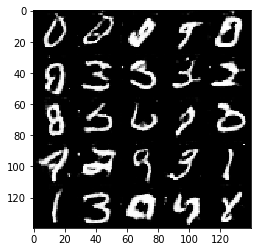

Epochs 2,batches 5510, dis_loss 1.4936844110488892 , gen_loss 4.557532787322998
Epochs 2,batches 5520, dis_loss 0.7929122447967529 , gen_loss 1.2604063749313354
Epochs 2,batches 5530, dis_loss 0.5567625164985657 , gen_loss 1.7522023916244507
Epochs 2,batches 5540, dis_loss 0.6807721853256226 , gen_loss 4.121110916137695
Epochs 2,batches 5550, dis_loss 1.2706246376037598 , gen_loss 0.756464421749115
Epochs 2,batches 5560, dis_loss 0.7704487442970276 , gen_loss 1.3889786005020142
Epochs 2,batches 5570, dis_loss 0.5154889225959778 , gen_loss 2.141239643096924
Epochs 2,batches 5580, dis_loss 1.5246045589447021 , gen_loss 0.47837013006210327
Epochs 2,batches 5590, dis_loss 0.7071356177330017 , gen_loss 1.477649450302124
Epochs 2,batches 5600, dis_loss 0.7931629419326782 , gen_loss 1.6144869327545166
Tensor("generator_57/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_57/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_57/conv2d_transpose_2/BiasAdd:0"

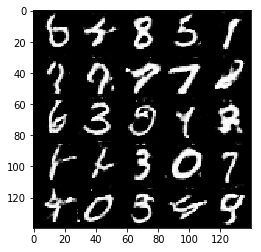

Epochs 2,batches 5610, dis_loss 1.2313032150268555 , gen_loss 0.7164527773857117
Epochs 2,batches 5620, dis_loss 0.3959088921546936 , gen_loss 3.2069077491760254
Epochs 2,batches 5630, dis_loss 0.7287179827690125 , gen_loss 1.6173553466796875
Epochs 2,batches 5640, dis_loss 0.48567476868629456 , gen_loss 2.836181640625
Epochs 2,batches 5650, dis_loss 0.6698015928268433 , gen_loss 1.5946284532546997
Epochs 2,batches 5660, dis_loss 0.7466665506362915 , gen_loss 1.2963707447052002
Epochs 2,batches 5670, dis_loss 0.5107170939445496 , gen_loss 2.332871913909912
Epochs 2,batches 5680, dis_loss 2.0021209716796875 , gen_loss 0.40345579385757446
Epochs 2,batches 5690, dis_loss 0.8738396167755127 , gen_loss 1.029139518737793
Epochs 2,batches 5700, dis_loss 0.7368155717849731 , gen_loss 1.6259267330169678
Tensor("generator_58/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_58/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_58/conv2d_transpose_2/BiasAdd:0"

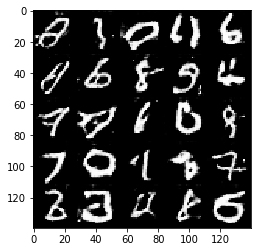

Epochs 2,batches 5710, dis_loss 1.4799705743789673 , gen_loss 0.5726984143257141
Epochs 2,batches 5720, dis_loss 0.6965937614440918 , gen_loss 1.5858702659606934
Epochs 2,batches 5730, dis_loss 0.6804558038711548 , gen_loss 1.4006468057632446
Epochs 2,batches 5740, dis_loss 0.7819095253944397 , gen_loss 1.2506787776947021
Epochs 2,batches 5750, dis_loss 0.7288047075271606 , gen_loss 1.2542579174041748
Epochs 2,batches 5760, dis_loss 1.4758062362670898 , gen_loss 0.5851086974143982
Epochs 2,batches 5770, dis_loss 0.40643954277038574 , gen_loss 3.0935328006744385
Epochs 2,batches 5780, dis_loss 0.703586220741272 , gen_loss 1.352708339691162
Epochs 2,batches 5790, dis_loss 0.535943329334259 , gen_loss 1.9517000913619995
Epochs 2,batches 5800, dis_loss 0.4805186986923218 , gen_loss 2.2147560119628906
Tensor("generator_59/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_59/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_59/conv2d_transpose_2/BiasAdd:

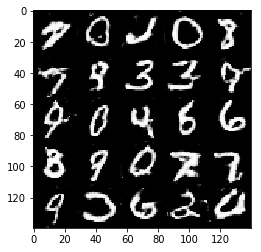

Epochs 2,batches 5810, dis_loss 0.42341095209121704 , gen_loss 2.711327314376831
Epochs 2,batches 5820, dis_loss 0.4900929927825928 , gen_loss 2.227904796600342
Epochs 2,batches 5830, dis_loss 0.9572222828865051 , gen_loss 1.1172151565551758
Epochs 2,batches 5840, dis_loss 0.5182857513427734 , gen_loss 2.353942632675171
Epochs 2,batches 5850, dis_loss 0.6222971677780151 , gen_loss 1.7353599071502686
Epochs 2,batches 5860, dis_loss 2.0279345512390137 , gen_loss 0.3259432315826416
Epochs 2,batches 5870, dis_loss 0.49800682067871094 , gen_loss 4.232001304626465
Epochs 2,batches 5880, dis_loss 2.732592821121216 , gen_loss 0.16226914525032043
Epochs 2,batches 5890, dis_loss 0.5009121298789978 , gen_loss 2.480846405029297
Epochs 2,batches 5900, dis_loss 0.8621479272842407 , gen_loss 1.196492075920105
Tensor("generator_60/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_60/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_60/conv2d_transpose_2/BiasAdd:0"

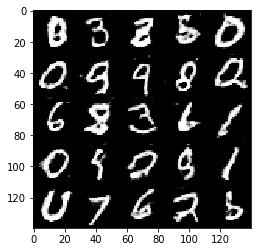

Epochs 2,batches 5910, dis_loss 0.6035085916519165 , gen_loss 1.6734960079193115
Epochs 2,batches 5920, dis_loss 0.6823711395263672 , gen_loss 1.4612187147140503
Epochs 2,batches 5930, dis_loss 0.9876043796539307 , gen_loss 0.8969086408615112
Epochs 2,batches 5940, dis_loss 0.4516572058200836 , gen_loss 2.7776436805725098
Epochs 2,batches 5950, dis_loss 0.6617295145988464 , gen_loss 1.5621310472488403
Epochs 2,batches 5960, dis_loss 0.45277464389801025 , gen_loss 2.3428900241851807
Epochs 2,batches 5970, dis_loss 0.543499767780304 , gen_loss 1.7842835187911987
Epochs 2,batches 5980, dis_loss 0.6027970314025879 , gen_loss 1.767343521118164
Epochs 2,batches 5990, dis_loss 0.5590284466743469 , gen_loss 2.0115044116973877
Epochs 2,batches 6000, dis_loss 0.6885374784469604 , gen_loss 1.6220968961715698
Tensor("generator_61/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_61/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_61/conv2d_transpose_2/BiasAdd

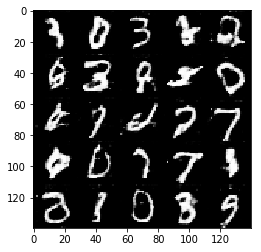

Epochs 2,batches 6010, dis_loss 0.6901981234550476 , gen_loss 1.6068673133850098
Epochs 2,batches 6020, dis_loss 0.484389990568161 , gen_loss 2.569133996963501
Epochs 2,batches 6030, dis_loss 0.5220046639442444 , gen_loss 2.3536620140075684
Epochs 2,batches 6040, dis_loss 1.051777958869934 , gen_loss 0.8368114829063416
Epochs 2,batches 6050, dis_loss 0.9365617036819458 , gen_loss 1.0264135599136353
Epochs 2,batches 6060, dis_loss 1.3450068235397339 , gen_loss 4.588573455810547
Epochs 2,batches 6070, dis_loss 0.5025749802589417 , gen_loss 2.201749086380005
Epochs 2,batches 6080, dis_loss 2.9605281352996826 , gen_loss 0.1600169837474823
Epochs 2,batches 6090, dis_loss 1.338803768157959 , gen_loss 0.6369565725326538
Epochs 2,batches 6100, dis_loss 0.7570348978042603 , gen_loss 1.2655446529388428
Tensor("generator_62/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_62/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_62/conv2d_transpose_2/BiasAdd:0", 

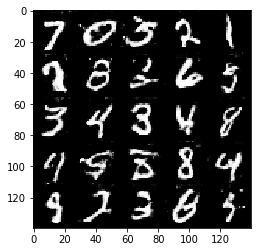

Epochs 2,batches 6110, dis_loss 0.4202113747596741 , gen_loss 2.8483643531799316
Epochs 2,batches 6120, dis_loss 0.5878838300704956 , gen_loss 1.8273191452026367
Epochs 2,batches 6130, dis_loss 2.133528232574463 , gen_loss 5.466404438018799
Epochs 2,batches 6140, dis_loss 1.3447378873825073 , gen_loss 0.6966919898986816
Epochs 2,batches 6150, dis_loss 0.4062071442604065 , gen_loss 3.055173873901367
Epochs 2,batches 6160, dis_loss 0.8492677211761475 , gen_loss 1.1037161350250244
Epochs 2,batches 6170, dis_loss 0.5586684346199036 , gen_loss 2.066176652908325
Epochs 2,batches 6180, dis_loss 0.6972928643226624 , gen_loss 1.4526437520980835
Epochs 2,batches 6190, dis_loss 1.151633858680725 , gen_loss 0.7869568467140198
Epochs 2,batches 6200, dis_loss 0.691636860370636 , gen_loss 1.417353868484497
Tensor("generator_63/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_63/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_63/conv2d_transpose_2/BiasAdd:0", s

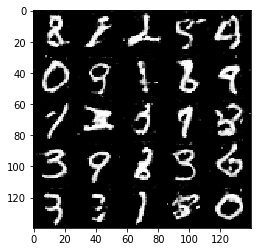

Epochs 2,batches 6210, dis_loss 0.9703659415245056 , gen_loss 0.9831784963607788
Epochs 2,batches 6220, dis_loss 0.6625096797943115 , gen_loss 1.558572769165039
Epochs 2,batches 6230, dis_loss 0.542292594909668 , gen_loss 2.1893539428710938
Epochs 2,batches 6240, dis_loss 1.1232584714889526 , gen_loss 0.8163238763809204
Epochs 2,batches 6250, dis_loss 0.518338143825531 , gen_loss 2.3482046127319336
Epochs 2,batches 6260, dis_loss 0.8883229494094849 , gen_loss 1.1593400239944458
Epochs 2,batches 6270, dis_loss 0.4513343572616577 , gen_loss 2.578948974609375
Epochs 2,batches 6280, dis_loss 1.4266244173049927 , gen_loss 0.6090832948684692
Epochs 2,batches 6290, dis_loss 0.5581464171409607 , gen_loss 1.7758537530899048
Epochs 2,batches 6300, dis_loss 0.4967900216579437 , gen_loss 2.327258586883545
Tensor("generator_64/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_64/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_64/conv2d_transpose_2/BiasAdd:0",

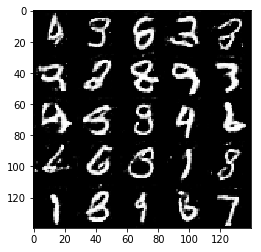

Epochs 2,batches 6310, dis_loss 0.6139947772026062 , gen_loss 1.7574496269226074
Epochs 2,batches 6320, dis_loss 0.4704955816268921 , gen_loss 2.3844051361083984
Epochs 2,batches 6330, dis_loss 0.44173508882522583 , gen_loss 2.6942243576049805
Epochs 2,batches 6340, dis_loss 0.7320795655250549 , gen_loss 5.137370586395264
Epochs 2,batches 6350, dis_loss 0.47991135716438293 , gen_loss 2.262357711791992
Epochs 2,batches 6360, dis_loss 0.7179204821586609 , gen_loss 1.3383891582489014
Epochs 2,batches 6370, dis_loss 0.7179210186004639 , gen_loss 1.4149521589279175
Epochs 2,batches 6380, dis_loss 0.6382806301116943 , gen_loss 2.121004343032837
Epochs 2,batches 6390, dis_loss 0.5415830016136169 , gen_loss 2.098240852355957
Epochs 2,batches 6400, dis_loss 0.9046550989151001 , gen_loss 1.3685405254364014
Tensor("generator_65/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_65/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_65/conv2d_transpose_2/BiasAdd:

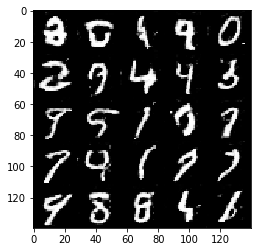

Epochs 2,batches 6410, dis_loss 0.8941943049430847 , gen_loss 1.2751433849334717
Epochs 2,batches 6420, dis_loss 0.49497801065444946 , gen_loss 2.3055708408355713
Epochs 2,batches 6430, dis_loss 0.5769942998886108 , gen_loss 1.794646978378296
Epochs 2,batches 6440, dis_loss 1.002435564994812 , gen_loss 1.2427477836608887
Epochs 2,batches 6450, dis_loss 1.1322579383850098 , gen_loss 0.7068024277687073
Epochs 2,batches 6460, dis_loss 0.7085195779800415 , gen_loss 1.446523666381836
Epochs 2,batches 6470, dis_loss 0.9755184650421143 , gen_loss 4.556582450866699
Epochs 2,batches 6480, dis_loss 1.4988675117492676 , gen_loss 4.528908729553223
Epochs 2,batches 6490, dis_loss 1.8220744132995605 , gen_loss 0.34696418046951294
Epochs 2,batches 6500, dis_loss 0.5019950270652771 , gen_loss 2.1791718006134033
Tensor("generator_66/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_66/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_66/conv2d_transpose_2/BiasAdd:0

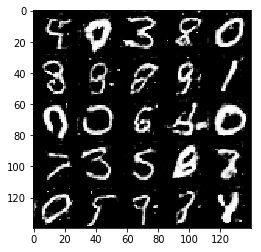

Epochs 2,batches 6510, dis_loss 0.7554969787597656 , gen_loss 1.2908252477645874
Epochs 2,batches 6520, dis_loss 0.6057632565498352 , gen_loss 1.5481622219085693
Epochs 2,batches 6530, dis_loss 0.5059137344360352 , gen_loss 2.4449667930603027
Epochs 2,batches 6540, dis_loss 0.7497127056121826 , gen_loss 1.4651036262512207
Epochs 2,batches 6550, dis_loss 0.7175570726394653 , gen_loss 2.671992301940918
Epochs 2,batches 6560, dis_loss 0.8727383017539978 , gen_loss 1.2230403423309326
Epochs 2,batches 6570, dis_loss 0.5907789468765259 , gen_loss 1.6593317985534668
Epochs 2,batches 6580, dis_loss 0.7960454225540161 , gen_loss 1.1958891153335571
Epochs 2,batches 6590, dis_loss 0.5692228078842163 , gen_loss 1.8699233531951904
Epochs 2,batches 6600, dis_loss 0.8209878206253052 , gen_loss 1.351136326789856
Tensor("generator_67/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_67/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_67/conv2d_transpose_2/BiasAdd:

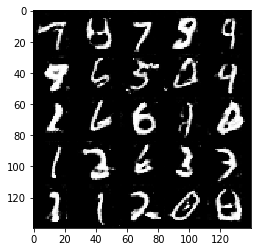

Epochs 2,batches 6610, dis_loss 1.2790477275848389 , gen_loss 0.8246666193008423
Epochs 2,batches 6620, dis_loss 1.1960959434509277 , gen_loss 0.7386518120765686
Epochs 2,batches 6630, dis_loss 0.6280949711799622 , gen_loss 1.6323610544204712
Epochs 2,batches 6640, dis_loss 0.7322307229042053 , gen_loss 1.2598075866699219
Epochs 2,batches 6650, dis_loss 1.2542253732681274 , gen_loss 0.7202886939048767
Epochs 2,batches 6660, dis_loss 0.5028135180473328 , gen_loss 2.55519437789917
Epochs 2,batches 6670, dis_loss 0.45763102173805237 , gen_loss 2.451228141784668
Epochs 2,batches 6680, dis_loss 0.8145906329154968 , gen_loss 1.0934571027755737
Epochs 2,batches 6690, dis_loss 0.810848593711853 , gen_loss 1.2838315963745117
Epochs 2,batches 6700, dis_loss 0.5504947304725647 , gen_loss 1.8803571462631226
Tensor("generator_68/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_68/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_68/conv2d_transpose_2/BiasAdd:0

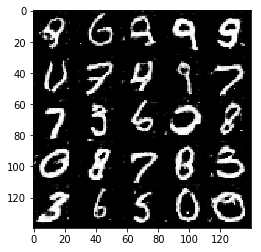

Epochs 2,batches 6710, dis_loss 0.55475914478302 , gen_loss 1.9280824661254883
Epochs 2,batches 6720, dis_loss 0.5090652704238892 , gen_loss 2.0949416160583496
Epochs 2,batches 6730, dis_loss 0.45721858739852905 , gen_loss 2.501204490661621
Epochs 2,batches 6740, dis_loss 0.5240130424499512 , gen_loss 2.055525779724121
Epochs 2,batches 6750, dis_loss 0.8915697336196899 , gen_loss 1.0545527935028076
Epochs 2,batches 6760, dis_loss 0.5812757015228271 , gen_loss 1.765197515487671
Epochs 2,batches 6770, dis_loss 0.7241412401199341 , gen_loss 1.300606608390808
Epochs 2,batches 6780, dis_loss 0.7342587113380432 , gen_loss 1.6224098205566406
Epochs 2,batches 6790, dis_loss 0.6747187376022339 , gen_loss 1.6966381072998047
Epochs 2,batches 6800, dis_loss 1.6749050617218018 , gen_loss 0.5556759834289551
Tensor("generator_69/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_69/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_69/conv2d_transpose_2/BiasAdd:0",

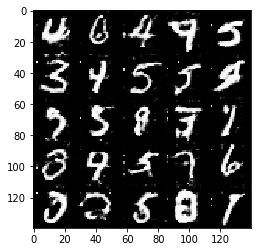

Epochs 2,batches 6810, dis_loss 0.6308949589729309 , gen_loss 1.7830268144607544
Epochs 2,batches 6820, dis_loss 1.7149341106414795 , gen_loss 0.6719545722007751
Epochs 2,batches 6830, dis_loss 1.4394385814666748 , gen_loss 0.4974859058856964
Epochs 2,batches 6840, dis_loss 1.1578729152679443 , gen_loss 0.787028431892395
Epochs 2,batches 6850, dis_loss 0.8334035873413086 , gen_loss 1.207237720489502
Epochs 2,batches 6860, dis_loss 0.855532169342041 , gen_loss 1.1413424015045166
Epochs 2,batches 6870, dis_loss 1.0328707695007324 , gen_loss 0.884317934513092
Epochs 2,batches 6880, dis_loss 0.6134630441665649 , gen_loss 1.6676476001739502
Epochs 2,batches 6890, dis_loss 0.4528038501739502 , gen_loss 2.5911593437194824
Epochs 2,batches 6900, dis_loss 1.0901234149932861 , gen_loss 0.9269974231719971
Tensor("generator_70/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_70/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_70/conv2d_transpose_2/BiasAdd:0"

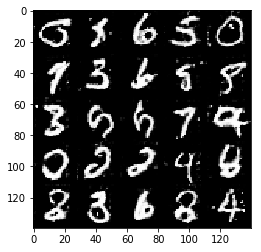

Epochs 2,batches 6910, dis_loss 0.7026805877685547 , gen_loss 1.3950371742248535
Epochs 2,batches 6920, dis_loss 0.614656388759613 , gen_loss 1.5258290767669678
Epochs 2,batches 6930, dis_loss 0.6617623567581177 , gen_loss 1.3950270414352417
Epochs 2,batches 6940, dis_loss 2.7958474159240723 , gen_loss 0.18569010496139526
Epochs 2,batches 6950, dis_loss 0.5823968648910522 , gen_loss 1.7768688201904297
Epochs 2,batches 6960, dis_loss 1.6631419658660889 , gen_loss 0.5473525524139404
Epochs 2,batches 6970, dis_loss 2.2015206813812256 , gen_loss 0.26161205768585205
Epochs 2,batches 6980, dis_loss 0.6091021299362183 , gen_loss 1.62211275100708
Epochs 2,batches 6990, dis_loss 1.0720536708831787 , gen_loss 0.9414675235748291
Epochs 2,batches 7000, dis_loss 0.6778035759925842 , gen_loss 1.4527240991592407
Tensor("generator_71/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_71/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_71/conv2d_transpose_2/BiasAdd

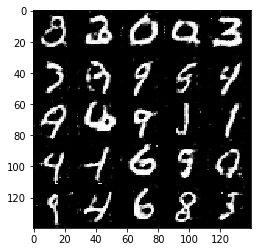

Epochs 2,batches 7010, dis_loss 0.6759887337684631 , gen_loss 1.45817232131958
Epochs 2,batches 7020, dis_loss 0.744333803653717 , gen_loss 2.5179476737976074
Epochs 2,batches 7030, dis_loss 0.5322781801223755 , gen_loss 1.9268763065338135
Epochs 2,batches 7040, dis_loss 0.7957988977432251 , gen_loss 1.44637131690979
Epochs 2,batches 7050, dis_loss 0.5169026851654053 , gen_loss 2.052992582321167
Epochs 2,batches 7060, dis_loss 0.6676853895187378 , gen_loss 1.536733865737915
Epochs 2,batches 7070, dis_loss 0.4734593331813812 , gen_loss 2.7257137298583984
Epochs 2,batches 7080, dis_loss 0.555324375629425 , gen_loss 1.9212336540222168
Epochs 2,batches 7090, dis_loss 0.8470166921615601 , gen_loss 1.2576342821121216
Epochs 2,batches 7100, dis_loss 0.7035008668899536 , gen_loss 1.3582992553710938
Tensor("generator_72/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_72/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_72/conv2d_transpose_2/BiasAdd:0", sh

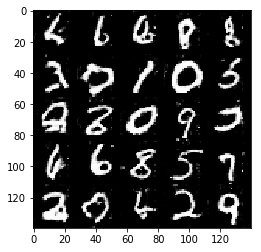

Epochs 2,batches 7110, dis_loss 0.908035397529602 , gen_loss 1.2832186222076416
Epochs 2,batches 7120, dis_loss 0.7162011861801147 , gen_loss 1.5523240566253662
Epochs 2,batches 7130, dis_loss 2.626816749572754 , gen_loss 0.22008594870567322
Epochs 2,batches 7140, dis_loss 0.5318207740783691 , gen_loss 1.9026305675506592
Epochs 2,batches 7150, dis_loss 0.5020549297332764 , gen_loss 2.244203567504883
Epochs 2,batches 7160, dis_loss 0.5646920800209045 , gen_loss 1.9365676641464233
Epochs 2,batches 7170, dis_loss 1.0068844556808472 , gen_loss 0.8798707723617554
Epochs 2,batches 7180, dis_loss 0.7315625548362732 , gen_loss 1.338419795036316
Epochs 2,batches 7190, dis_loss 0.4468840956687927 , gen_loss 2.4386379718780518
Epochs 2,batches 7200, dis_loss 0.5611693859100342 , gen_loss 1.7491871118545532
Tensor("generator_73/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_73/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_73/conv2d_transpose_2/BiasAdd:0

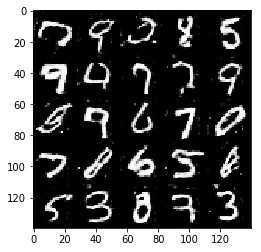

Epochs 2,batches 7210, dis_loss 0.545425534248352 , gen_loss 1.9526526927947998
Epochs 2,batches 7220, dis_loss 0.8637509942054749 , gen_loss 1.2307872772216797
Epochs 2,batches 7230, dis_loss 0.4922771155834198 , gen_loss 2.5045552253723145
Epochs 2,batches 7240, dis_loss 0.6959629654884338 , gen_loss 1.5651599168777466
Epochs 2,batches 7250, dis_loss 0.6804865598678589 , gen_loss 1.4788472652435303
Epochs 2,batches 7260, dis_loss 0.9342947006225586 , gen_loss 0.9622030258178711
Epochs 2,batches 7270, dis_loss 0.45675337314605713 , gen_loss 2.4881348609924316
Epochs 2,batches 7280, dis_loss 1.3877357244491577 , gen_loss 0.5125261545181274
Epochs 2,batches 7290, dis_loss 0.6902943849563599 , gen_loss 1.4518712759017944
Epochs 2,batches 7300, dis_loss 1.7076890468597412 , gen_loss 0.5249834060668945
Tensor("generator_74/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_74/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_74/conv2d_transpose_2/BiasAd

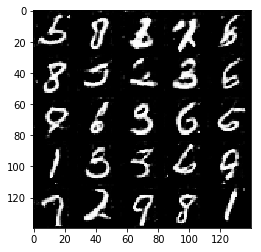

Epochs 2,batches 7310, dis_loss 0.7286449670791626 , gen_loss 1.3169403076171875
Epochs 2,batches 7320, dis_loss 0.6963664889335632 , gen_loss 1.40067458152771
Epochs 2,batches 7330, dis_loss 0.447922021150589 , gen_loss 2.8109493255615234
Epochs 2,batches 7340, dis_loss 0.5464968085289001 , gen_loss 2.179804801940918
Epochs 2,batches 7350, dis_loss 0.9286693334579468 , gen_loss 0.944453775882721
Epochs 2,batches 7360, dis_loss 0.43523406982421875 , gen_loss 2.98364520072937
Epochs 2,batches 7370, dis_loss 3.2737114429473877 , gen_loss 0.11082093417644501
Epochs 2,batches 7380, dis_loss 1.0985984802246094 , gen_loss 0.7653294801712036
Epochs 2,batches 7390, dis_loss 0.598453164100647 , gen_loss 1.887694001197815
Epochs 2,batches 7400, dis_loss 0.8963308334350586 , gen_loss 1.0361160039901733
Tensor("generator_75/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_75/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_75/conv2d_transpose_2/BiasAdd:0", s

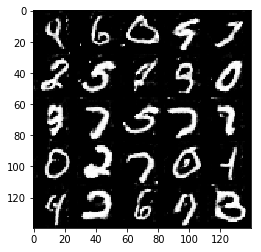

Epochs 2,batches 7410, dis_loss 0.7379563450813293 , gen_loss 1.3891057968139648
Epochs 2,batches 7420, dis_loss 0.4638465642929077 , gen_loss 2.334425449371338
Epochs 2,batches 7430, dis_loss 1.2457252740859985 , gen_loss 0.7192716002464294
Epochs 2,batches 7440, dis_loss 0.5693764686584473 , gen_loss 1.806443452835083
Epochs 2,batches 7450, dis_loss 0.9918134212493896 , gen_loss 0.9631108045578003
Epochs 2,batches 7460, dis_loss 0.5355551242828369 , gen_loss 2.115687370300293
Epochs 2,batches 7470, dis_loss 0.90351802110672 , gen_loss 1.035395860671997
Epochs 2,batches 7480, dis_loss 0.7311851382255554 , gen_loss 1.4977476596832275
Epochs 2,batches 7490, dis_loss 0.8244829177856445 , gen_loss 1.1500707864761353
Epochs 2,batches 7500, dis_loss 1.0871597528457642 , gen_loss 0.8736198544502258
Tensor("generator_76/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_76/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_76/conv2d_transpose_2/BiasAdd:0", 

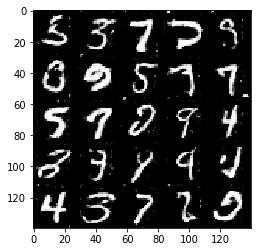

NameError: name 'saver' is not defined

In [13]:
batch_size = 16
z_dim = 100
learning_rate = 0.0008
beta1 = 0.35



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Tensor("generator/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator/conv2d_transpose_2/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)
initial output
Tensor("generator_1/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_1/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_1/conv2d_transpose_2/BiasAdd:0", shape=(?, 28, 28, 3), dtype=float32)


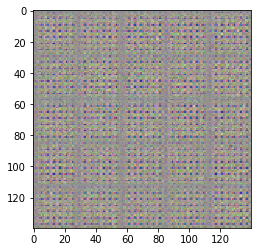

Epochs 1,batches 10, dis_loss 3.3578298091888428 , gen_loss 0.24074004590511322
Epochs 1,batches 20, dis_loss 4.5892438888549805 , gen_loss 0.06624917685985565
Epochs 1,batches 30, dis_loss 1.3961089849472046 , gen_loss 1.1240309476852417
Epochs 1,batches 40, dis_loss 2.1695563793182373 , gen_loss 0.2573181986808777
Epochs 1,batches 50, dis_loss 2.417099952697754 , gen_loss 0.18200165033340454
Epochs 1,batches 60, dis_loss 1.2241874933242798 , gen_loss 1.6471613645553589
Epochs 1,batches 70, dis_loss 1.5221447944641113 , gen_loss 0.6228076219558716
Epochs 1,batches 80, dis_loss 3.03088641166687 , gen_loss 0.08748924732208252
Epochs 1,batches 90, dis_loss 2.2409942150115967 , gen_loss 0.1861652284860611
Epochs 1,batches 100, dis_loss 1.5445046424865723 , gen_loss 1.6855524778366089
Tensor("generator_2/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_2/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_2/conv2d_transpose_2/BiasAdd:0", shape=(?, 28, 2

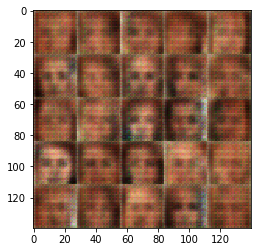

Epochs 1,batches 110, dis_loss 1.436966061592102 , gen_loss 0.7527422904968262
Epochs 1,batches 120, dis_loss 1.2387549877166748 , gen_loss 0.7716234922409058
Epochs 1,batches 130, dis_loss 2.7367610931396484 , gen_loss 0.12087387591600418
Epochs 1,batches 140, dis_loss 1.564174771308899 , gen_loss 2.19044828414917
Epochs 1,batches 150, dis_loss 0.7073236107826233 , gen_loss 1.615647792816162
Epochs 1,batches 160, dis_loss 0.4511689841747284 , gen_loss 2.98262882232666
Epochs 1,batches 170, dis_loss 2.0356035232543945 , gen_loss 2.9900379180908203
Epochs 1,batches 180, dis_loss 1.3860353231430054 , gen_loss 0.5956853628158569
Epochs 1,batches 190, dis_loss 2.063725709915161 , gen_loss 3.0730605125427246
Epochs 1,batches 200, dis_loss 1.8183395862579346 , gen_loss 0.31415730714797974
Tensor("generator_3/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_3/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_3/conv2d_transpose_2/BiasAdd:0", shape=(?, 28,

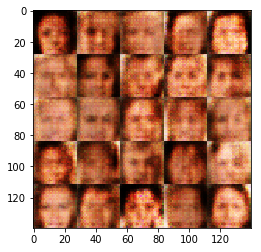

Epochs 1,batches 210, dis_loss 0.5414102077484131 , gen_loss 3.064821243286133
Epochs 1,batches 220, dis_loss 2.03216552734375 , gen_loss 0.2637869715690613
Epochs 1,batches 230, dis_loss 1.6821072101593018 , gen_loss 0.3865915536880493
Epochs 1,batches 240, dis_loss 1.6495163440704346 , gen_loss 4.595359802246094
Epochs 1,batches 250, dis_loss 1.2397063970565796 , gen_loss 0.5871280431747437
Epochs 1,batches 260, dis_loss 1.6071093082427979 , gen_loss 0.40993762016296387
Epochs 1,batches 270, dis_loss 1.2141577005386353 , gen_loss 0.734883189201355
Epochs 1,batches 280, dis_loss 0.5254190564155579 , gen_loss 2.2979345321655273
Epochs 1,batches 290, dis_loss 3.3196887969970703 , gen_loss 3.649205207824707
Epochs 1,batches 300, dis_loss 1.3916902542114258 , gen_loss 0.7386164665222168
Tensor("generator_4/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_4/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_4/conv2d_transpose_2/BiasAdd:0", shape=(?, 28

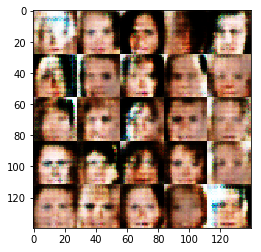

Epochs 1,batches 310, dis_loss 1.213057041168213 , gen_loss 0.7316059470176697
Epochs 1,batches 320, dis_loss 1.2047302722930908 , gen_loss 0.8193391561508179
Epochs 1,batches 330, dis_loss 1.2881487607955933 , gen_loss 0.8266964554786682
Epochs 1,batches 340, dis_loss 1.1631052494049072 , gen_loss 1.0177581310272217
Epochs 1,batches 350, dis_loss 1.107497215270996 , gen_loss 2.051496982574463
Epochs 1,batches 360, dis_loss 0.5787640810012817 , gen_loss 1.6329195499420166
Epochs 1,batches 370, dis_loss 1.8104324340820312 , gen_loss 0.34331652522087097
Epochs 1,batches 380, dis_loss 0.5708412528038025 , gen_loss 1.6205105781555176
Epochs 1,batches 390, dis_loss 1.69324791431427 , gen_loss 0.526260256767273
Epochs 1,batches 400, dis_loss 0.7506935596466064 , gen_loss 1.296447992324829
Tensor("generator_5/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_5/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_5/conv2d_transpose_2/BiasAdd:0", shape=(?, 28,

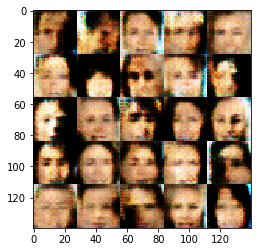

Epochs 1,batches 410, dis_loss 1.4869880676269531 , gen_loss 0.6760345697402954
Epochs 1,batches 420, dis_loss 1.2115792036056519 , gen_loss 0.908260703086853
Epochs 1,batches 430, dis_loss 1.2136197090148926 , gen_loss 1.4962215423583984
Epochs 1,batches 440, dis_loss 0.9555296897888184 , gen_loss 2.500523567199707
Epochs 1,batches 450, dis_loss 1.0996371507644653 , gen_loss 0.7299427390098572
Epochs 1,batches 460, dis_loss 1.4883878231048584 , gen_loss 2.8885297775268555
Epochs 1,batches 470, dis_loss 0.6737067699432373 , gen_loss 1.6175141334533691
Epochs 1,batches 480, dis_loss 1.822683334350586 , gen_loss 0.2933344542980194
Epochs 1,batches 490, dis_loss 2.0148873329162598 , gen_loss 0.21571679413318634
Epochs 1,batches 500, dis_loss 0.7448381185531616 , gen_loss 2.306533098220825
Tensor("generator_6/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_6/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_6/conv2d_transpose_2/BiasAdd:0", shape=(?, 

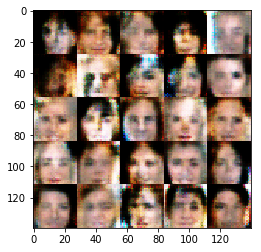

Epochs 1,batches 510, dis_loss 0.7086101770401001 , gen_loss 2.597937822341919
Epochs 1,batches 520, dis_loss 0.6022049188613892 , gen_loss 1.658468246459961
Epochs 1,batches 530, dis_loss 1.2836685180664062 , gen_loss 0.7485799789428711
Epochs 1,batches 540, dis_loss 1.3560352325439453 , gen_loss 0.5935052633285522
Epochs 1,batches 550, dis_loss 1.2857533693313599 , gen_loss 2.0834827423095703
Epochs 1,batches 560, dis_loss 0.6745747327804565 , gen_loss 1.3427084684371948
Epochs 1,batches 570, dis_loss 1.174566626548767 , gen_loss 1.0102190971374512
Epochs 1,batches 580, dis_loss 1.0733100175857544 , gen_loss 2.0662546157836914
Epochs 1,batches 590, dis_loss 1.4220296144485474 , gen_loss 0.4979480504989624
Epochs 1,batches 600, dis_loss 0.9947226047515869 , gen_loss 0.9658635854721069
Tensor("generator_7/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_7/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_7/conv2d_transpose_2/BiasAdd:0", shape=(?, 

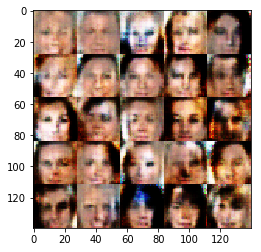

Epochs 1,batches 610, dis_loss 0.9484495520591736 , gen_loss 1.4033267498016357
Epochs 1,batches 620, dis_loss 0.585010290145874 , gen_loss 1.6343994140625
Epochs 1,batches 630, dis_loss 1.138173222541809 , gen_loss 0.7711799144744873
Epochs 1,batches 640, dis_loss 0.7437444925308228 , gen_loss 1.4216806888580322
Epochs 1,batches 650, dis_loss 1.157947063446045 , gen_loss 0.6250374913215637
Epochs 1,batches 660, dis_loss 1.5238277912139893 , gen_loss 0.39433377981185913
Epochs 1,batches 670, dis_loss 1.6037710905075073 , gen_loss 2.0239996910095215
Epochs 1,batches 680, dis_loss 2.488454818725586 , gen_loss 0.13948389887809753
Epochs 1,batches 690, dis_loss 1.3270659446716309 , gen_loss 0.5126253366470337
Epochs 1,batches 700, dis_loss 0.9532985687255859 , gen_loss 2.848351001739502
Tensor("generator_8/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_8/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_8/conv2d_transpose_2/BiasAdd:0", shape=(?, 28,

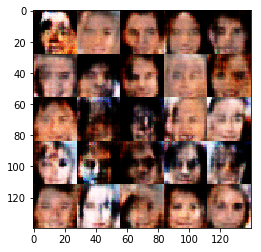

Epochs 1,batches 710, dis_loss 1.0292991399765015 , gen_loss 0.749225378036499
Epochs 1,batches 720, dis_loss 0.8903895020484924 , gen_loss 0.9965931177139282
Epochs 1,batches 730, dis_loss 0.5814117193222046 , gen_loss 1.5782718658447266
Epochs 1,batches 740, dis_loss 3.379728317260742 , gen_loss 0.057144008576869965
Epochs 1,batches 750, dis_loss 1.2823190689086914 , gen_loss 0.6071500778198242
Epochs 1,batches 760, dis_loss 1.2960100173950195 , gen_loss 0.6945411562919617
Epochs 1,batches 770, dis_loss 1.084766149520874 , gen_loss 0.6988019347190857
Epochs 1,batches 780, dis_loss 0.929372251033783 , gen_loss 1.2335373163223267
Epochs 1,batches 790, dis_loss 0.5596474409103394 , gen_loss 2.4349141120910645
Epochs 1,batches 800, dis_loss 1.0801942348480225 , gen_loss 0.7844223976135254
Tensor("generator_9/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_9/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_9/conv2d_transpose_2/BiasAdd:0", shape=(?,

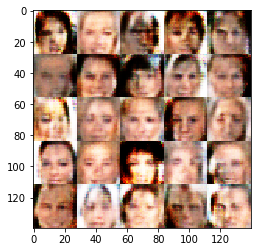

Epochs 1,batches 810, dis_loss 1.0414478778839111 , gen_loss 0.752410888671875
Epochs 1,batches 820, dis_loss 0.8316175937652588 , gen_loss 1.0301334857940674
Epochs 1,batches 830, dis_loss 0.7638636827468872 , gen_loss 1.1238138675689697
Epochs 1,batches 840, dis_loss 0.5064608454704285 , gen_loss 2.9904422760009766
Epochs 1,batches 850, dis_loss 0.9711819887161255 , gen_loss 0.8594396710395813
Epochs 1,batches 860, dis_loss 0.9482022523880005 , gen_loss 0.8788540959358215
Epochs 1,batches 870, dis_loss 0.4586542248725891 , gen_loss 2.4459915161132812
Epochs 1,batches 880, dis_loss 1.250473976135254 , gen_loss 0.7115038633346558
Epochs 1,batches 890, dis_loss 1.424576997756958 , gen_loss 0.47502702474594116
Epochs 1,batches 900, dis_loss 1.0243759155273438 , gen_loss 0.9926460385322571
Tensor("generator_10/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_10/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_10/conv2d_transpose_2/BiasAdd:0", shape=

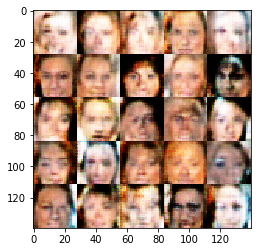

Epochs 1,batches 910, dis_loss 2.2141170501708984 , gen_loss 0.19791200757026672
Epochs 1,batches 920, dis_loss 1.0686981678009033 , gen_loss 2.112307548522949
Epochs 1,batches 930, dis_loss 2.075343608856201 , gen_loss 0.2331051230430603
Epochs 1,batches 940, dis_loss 1.0511670112609863 , gen_loss 0.8225744962692261
Epochs 1,batches 950, dis_loss 1.0604606866836548 , gen_loss 0.9643428325653076
Epochs 1,batches 960, dis_loss 1.3357300758361816 , gen_loss 0.5266464948654175
Epochs 1,batches 970, dis_loss 0.969278872013092 , gen_loss 1.1230807304382324
Epochs 1,batches 980, dis_loss 0.5442774295806885 , gen_loss 1.8175374269485474
Epochs 1,batches 990, dis_loss 1.3490307331085205 , gen_loss 0.48306018114089966
Epochs 1,batches 1000, dis_loss 1.003119945526123 , gen_loss 2.6073389053344727
Tensor("generator_11/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_11/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_11/conv2d_transpose_2/BiasAdd:0", shape

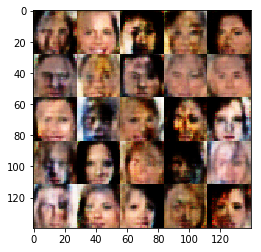

Epochs 1,batches 1010, dis_loss 0.3696480393409729 , gen_loss 3.85422420501709
Epochs 1,batches 1020, dis_loss 3.781024932861328 , gen_loss 3.999326229095459
Epochs 1,batches 1030, dis_loss 1.5238947868347168 , gen_loss 1.0743719339370728
Epochs 1,batches 1040, dis_loss 1.47367262840271 , gen_loss 0.5868685841560364
Epochs 1,batches 1050, dis_loss 0.5255502462387085 , gen_loss 1.8534754514694214
Epochs 1,batches 1060, dis_loss 2.845661163330078 , gen_loss 0.11510421335697174
Epochs 1,batches 1070, dis_loss 1.1729079484939575 , gen_loss 0.9120290875434875
Epochs 1,batches 1080, dis_loss 1.4300000667572021 , gen_loss 0.5195403695106506
Epochs 1,batches 1090, dis_loss 1.4766559600830078 , gen_loss 0.4971533417701721
Epochs 1,batches 1100, dis_loss 0.8766893744468689 , gen_loss 1.0184437036514282
Tensor("generator_12/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_12/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_12/conv2d_transpose_2/BiasAdd:0", 

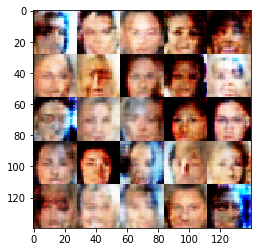

Epochs 1,batches 1110, dis_loss 2.7564432621002197 , gen_loss 3.6050267219543457
Epochs 1,batches 1120, dis_loss 1.058976173400879 , gen_loss 0.8288805484771729
Epochs 1,batches 1130, dis_loss 0.8362253904342651 , gen_loss 0.9697456359863281
Epochs 1,batches 1140, dis_loss 0.9304409027099609 , gen_loss 0.8676186800003052
Epochs 1,batches 1150, dis_loss 2.0856430530548096 , gen_loss 2.8548707962036133
Epochs 1,batches 1160, dis_loss 0.9725602865219116 , gen_loss 2.0073885917663574
Epochs 1,batches 1170, dis_loss 0.8748925924301147 , gen_loss 0.9535672664642334
Epochs 1,batches 1180, dis_loss 0.9944841265678406 , gen_loss 1.0057013034820557
Epochs 1,batches 1190, dis_loss 0.8460177183151245 , gen_loss 0.9919605851173401
Epochs 1,batches 1200, dis_loss 1.3627748489379883 , gen_loss 0.49513477087020874
Tensor("generator_13/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_13/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_13/conv2d_transpose_2/BiasAd

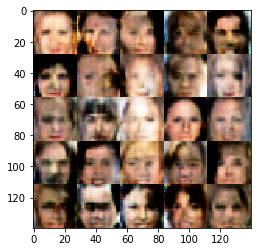

Epochs 1,batches 1210, dis_loss 1.4535883665084839 , gen_loss 0.42996230721473694
Epochs 1,batches 1220, dis_loss 1.5145972967147827 , gen_loss 0.40381884574890137
Epochs 1,batches 1230, dis_loss 1.672163724899292 , gen_loss 0.3413159251213074
Epochs 1,batches 1240, dis_loss 0.8772469162940979 , gen_loss 1.0370151996612549
Epochs 1,batches 1250, dis_loss 1.3511186838150024 , gen_loss 0.5033341646194458
Epochs 1,batches 1260, dis_loss 0.5633382201194763 , gen_loss 2.082796096801758
Epochs 1,batches 1270, dis_loss 1.1720131635665894 , gen_loss 0.6286723017692566
Epochs 1,batches 1280, dis_loss 0.9362506866455078 , gen_loss 1.0935962200164795
Epochs 1,batches 1290, dis_loss 1.250516653060913 , gen_loss 0.6219515800476074
Epochs 1,batches 1300, dis_loss 0.42523661255836487 , gen_loss 2.8564701080322266
Tensor("generator_14/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_14/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_14/conv2d_transpose_2/BiasAd

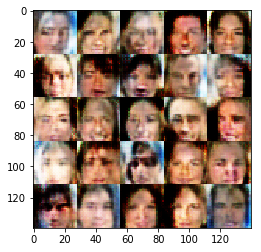

Epochs 1,batches 1310, dis_loss 0.8579323291778564 , gen_loss 1.04248046875
Epochs 1,batches 1320, dis_loss 0.8849413394927979 , gen_loss 1.2690764665603638
Epochs 1,batches 1330, dis_loss 0.45479315519332886 , gen_loss 2.507565975189209
Epochs 1,batches 1340, dis_loss 0.9898282885551453 , gen_loss 0.9833946228027344
Epochs 1,batches 1350, dis_loss 1.3399875164031982 , gen_loss 0.5393725037574768
Epochs 1,batches 1360, dis_loss 1.3671724796295166 , gen_loss 0.4761389195919037
Epochs 1,batches 1370, dis_loss 0.7384769916534424 , gen_loss 1.4651577472686768
Epochs 1,batches 1380, dis_loss 1.2947235107421875 , gen_loss 1.643909215927124
Epochs 1,batches 1390, dis_loss 0.8545189499855042 , gen_loss 2.6541175842285156
Epochs 1,batches 1400, dis_loss 0.9674304723739624 , gen_loss 0.868152379989624
Tensor("generator_15/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_15/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_15/conv2d_transpose_2/BiasAdd:0", s

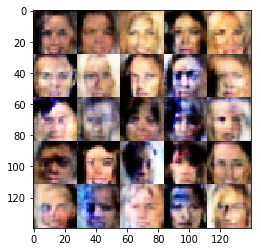

Epochs 1,batches 1410, dis_loss 0.3998403549194336 , gen_loss 3.4128823280334473
Epochs 1,batches 1420, dis_loss 1.323710322380066 , gen_loss 1.8977148532867432
Epochs 1,batches 1430, dis_loss 1.6812412738800049 , gen_loss 0.32225698232650757
Epochs 1,batches 1440, dis_loss 0.5997552871704102 , gen_loss 2.788074493408203
Epochs 1,batches 1450, dis_loss 1.3188598155975342 , gen_loss 0.8840606808662415
Epochs 1,batches 1460, dis_loss 1.292726755142212 , gen_loss 0.7082409858703613
Epochs 1,batches 1470, dis_loss 1.357875108718872 , gen_loss 0.5335440635681152
Epochs 1,batches 1480, dis_loss 1.2045772075653076 , gen_loss 0.6419128179550171
Epochs 1,batches 1490, dis_loss 1.2070401906967163 , gen_loss 0.948906421661377
Epochs 1,batches 1500, dis_loss 0.9111000895500183 , gen_loss 1.499091386795044
Tensor("generator_16/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_16/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_16/conv2d_transpose_2/BiasAdd:0",

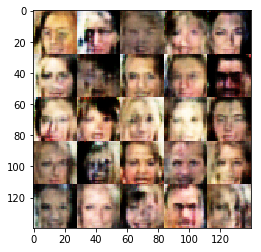

Epochs 1,batches 1510, dis_loss 1.4377137422561646 , gen_loss 0.4317561388015747
Epochs 1,batches 1520, dis_loss 0.5645027160644531 , gen_loss 1.7243562936782837
Epochs 1,batches 1530, dis_loss 0.4197691082954407 , gen_loss 2.659418821334839
Epochs 1,batches 1540, dis_loss 1.182283878326416 , gen_loss 0.7233880758285522
Epochs 1,batches 1550, dis_loss 0.5173247456550598 , gen_loss 2.4337644577026367
Epochs 1,batches 1560, dis_loss 1.559802532196045 , gen_loss 0.37960824370384216
Epochs 1,batches 1570, dis_loss 1.558640480041504 , gen_loss 0.3828299939632416
Epochs 1,batches 1580, dis_loss 0.694512128829956 , gen_loss 1.6620404720306396
Epochs 1,batches 1590, dis_loss 0.7314870357513428 , gen_loss 1.573952317237854
Epochs 1,batches 1600, dis_loss 0.7140211462974548 , gen_loss 1.9107261896133423
Tensor("generator_17/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_17/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_17/conv2d_transpose_2/BiasAdd:0",

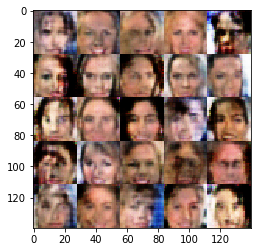

Epochs 1,batches 1610, dis_loss 2.364776134490967 , gen_loss 0.20328238606452942
Epochs 1,batches 1620, dis_loss 1.0193017721176147 , gen_loss 1.0333768129348755
Epochs 1,batches 1630, dis_loss 1.1450289487838745 , gen_loss 0.6228542923927307
Epochs 1,batches 1640, dis_loss 0.975856363773346 , gen_loss 0.8050338625907898
Epochs 1,batches 1650, dis_loss 1.5298068523406982 , gen_loss 0.6237037181854248
Epochs 1,batches 1660, dis_loss 1.1523295640945435 , gen_loss 0.983695924282074
Epochs 1,batches 1670, dis_loss 1.2271411418914795 , gen_loss 0.9268712997436523
Epochs 1,batches 1680, dis_loss 1.314605712890625 , gen_loss 0.5576806664466858
Epochs 1,batches 1690, dis_loss 1.4731390476226807 , gen_loss 0.42280054092407227
Epochs 1,batches 1700, dis_loss 1.5501282215118408 , gen_loss 0.4044502079486847
Tensor("generator_18/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_18/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_18/conv2d_transpose_2/BiasAdd:

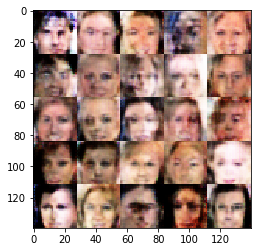

Epochs 1,batches 1710, dis_loss 0.9423503875732422 , gen_loss 0.8695061802864075
Epochs 1,batches 1720, dis_loss 1.2364716529846191 , gen_loss 2.1972970962524414
Epochs 1,batches 1730, dis_loss 0.6242421865463257 , gen_loss 1.5759193897247314
Epochs 1,batches 1740, dis_loss 1.7264635562896729 , gen_loss 3.239222526550293
Epochs 1,batches 1750, dis_loss 0.6038336753845215 , gen_loss 1.6469473838806152
Epochs 1,batches 1760, dis_loss 1.5586223602294922 , gen_loss 0.4945017695426941
Epochs 1,batches 1770, dis_loss 1.4464805126190186 , gen_loss 0.5274262428283691
Epochs 1,batches 1780, dis_loss 1.6843551397323608 , gen_loss 0.38182276487350464
Epochs 1,batches 1790, dis_loss 1.4376699924468994 , gen_loss 0.9144690036773682
Epochs 1,batches 1800, dis_loss 1.146389126777649 , gen_loss 0.6866526007652283
Tensor("generator_19/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_19/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_19/conv2d_transpose_2/BiasAdd

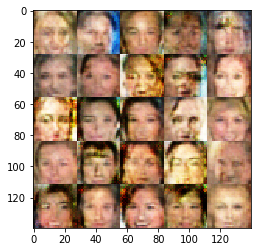

Epochs 1,batches 1810, dis_loss 1.1988499164581299 , gen_loss 1.2052102088928223
Epochs 1,batches 1820, dis_loss 1.2411704063415527 , gen_loss 1.595078706741333
Epochs 1,batches 1830, dis_loss 1.038699746131897 , gen_loss 0.8313511610031128
Epochs 1,batches 1840, dis_loss 1.0133668184280396 , gen_loss 0.7941914796829224
Epochs 1,batches 1850, dis_loss 0.8935645222663879 , gen_loss 1.199228286743164
Epochs 1,batches 1860, dis_loss 1.968799114227295 , gen_loss 0.23868118226528168
Epochs 1,batches 1870, dis_loss 1.5779775381088257 , gen_loss 0.38961878418922424
Epochs 1,batches 1880, dis_loss 0.9513162970542908 , gen_loss 0.8563540577888489
Epochs 1,batches 1890, dis_loss 1.4412178993225098 , gen_loss 0.45473694801330566
Epochs 1,batches 1900, dis_loss 0.6149905323982239 , gen_loss 1.5474047660827637
Tensor("generator_20/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_20/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_20/conv2d_transpose_2/BiasAdd

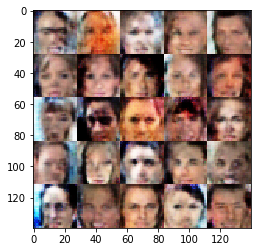

Epochs 1,batches 1910, dis_loss 1.458863615989685 , gen_loss 0.5021935105323792
Epochs 1,batches 1920, dis_loss 1.3763413429260254 , gen_loss 2.2275588512420654
Epochs 1,batches 1930, dis_loss 0.55272376537323 , gen_loss 2.689077854156494
Epochs 1,batches 1940, dis_loss 1.2351043224334717 , gen_loss 0.90675288438797
Epochs 1,batches 1950, dis_loss 2.2044031620025635 , gen_loss 0.183768168091774
Epochs 1,batches 1960, dis_loss 1.2049901485443115 , gen_loss 0.812370777130127
Epochs 1,batches 1970, dis_loss 1.3808650970458984 , gen_loss 1.2081118822097778
Epochs 1,batches 1980, dis_loss 2.061422109603882 , gen_loss 0.24542897939682007
Epochs 1,batches 1990, dis_loss 1.2426745891571045 , gen_loss 0.5580536723136902
Epochs 1,batches 2000, dis_loss 0.9118494987487793 , gen_loss 0.9431270360946655
Tensor("generator_21/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_21/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_21/conv2d_transpose_2/BiasAdd:0", sh

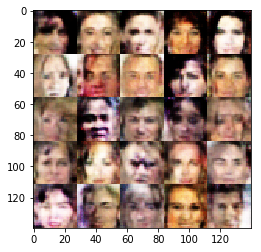

Epochs 1,batches 2010, dis_loss 1.0315946340560913 , gen_loss 1.3255523443222046
Epochs 1,batches 2020, dis_loss 0.9124337434768677 , gen_loss 1.2194855213165283
Epochs 1,batches 2030, dis_loss 0.9604653120040894 , gen_loss 0.8641018867492676
Epochs 1,batches 2040, dis_loss 3.1157712936401367 , gen_loss 0.07588937878608704
Epochs 1,batches 2050, dis_loss 2.214106559753418 , gen_loss 0.19108811020851135
Epochs 1,batches 2060, dis_loss 2.5374574661254883 , gen_loss 0.14775589108467102
Epochs 1,batches 2070, dis_loss 1.2789247035980225 , gen_loss 0.547368049621582
Epochs 1,batches 2080, dis_loss 0.672491192817688 , gen_loss 1.4572925567626953
Epochs 1,batches 2090, dis_loss 1.3904216289520264 , gen_loss 0.5564147233963013
Epochs 1,batches 2100, dis_loss 1.6120243072509766 , gen_loss 0.3503323793411255
Tensor("generator_22/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_22/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_22/conv2d_transpose_2/BiasAd

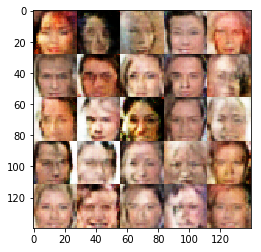

Epochs 1,batches 2110, dis_loss 1.536339521408081 , gen_loss 1.558677315711975
Epochs 1,batches 2120, dis_loss 0.9546682834625244 , gen_loss 0.8467901945114136
Epochs 1,batches 2130, dis_loss 0.6249074935913086 , gen_loss 1.508743166923523
Epochs 1,batches 2140, dis_loss 1.2177172899246216 , gen_loss 0.9810735583305359
Epochs 1,batches 2150, dis_loss 0.6636279225349426 , gen_loss 2.2585766315460205
Epochs 1,batches 2160, dis_loss 1.4460954666137695 , gen_loss 0.44690340757369995
Epochs 1,batches 2170, dis_loss 1.3235509395599365 , gen_loss 0.6990483999252319
Epochs 1,batches 2180, dis_loss 1.2118569612503052 , gen_loss 0.8373890519142151
Epochs 1,batches 2190, dis_loss 1.066542148590088 , gen_loss 0.9296505451202393
Epochs 1,batches 2200, dis_loss 1.4595763683319092 , gen_loss 0.7895441055297852
Tensor("generator_23/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_23/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_23/conv2d_transpose_2/BiasAdd:0

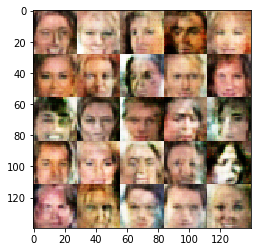

Epochs 1,batches 2210, dis_loss 1.4640681743621826 , gen_loss 0.7641077041625977
Epochs 1,batches 2220, dis_loss 1.1172354221343994 , gen_loss 0.9047245979309082
Epochs 1,batches 2230, dis_loss 1.2332466840744019 , gen_loss 0.7256526947021484
Epochs 1,batches 2240, dis_loss 1.5320156812667847 , gen_loss 0.5631393194198608
Epochs 1,batches 2250, dis_loss 1.422585129737854 , gen_loss 0.4385957717895508
Epochs 1,batches 2260, dis_loss 1.289405345916748 , gen_loss 0.8269033432006836
Epochs 1,batches 2270, dis_loss 2.389009475708008 , gen_loss 0.15386071801185608
Epochs 1,batches 2280, dis_loss 1.0222358703613281 , gen_loss 1.2068573236465454
Epochs 1,batches 2290, dis_loss 3.196749448776245 , gen_loss 0.06796901673078537
Epochs 1,batches 2300, dis_loss 1.193843126296997 , gen_loss 1.8982725143432617
Tensor("generator_24/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_24/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_24/conv2d_transpose_2/BiasAdd:0

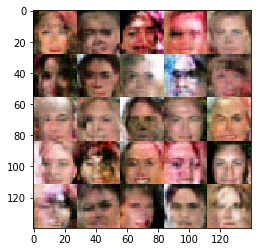

Epochs 1,batches 2310, dis_loss 2.357469320297241 , gen_loss 0.15779975056648254
Epochs 1,batches 2320, dis_loss 2.861178398132324 , gen_loss 3.072279930114746
Epochs 1,batches 2330, dis_loss 0.8938413858413696 , gen_loss 1.080284833908081
Epochs 1,batches 2340, dis_loss 1.5394225120544434 , gen_loss 0.48499345779418945
Epochs 1,batches 2350, dis_loss 1.061404824256897 , gen_loss 0.9205676317214966
Epochs 1,batches 2360, dis_loss 1.347670316696167 , gen_loss 0.8061165809631348
Epochs 1,batches 2370, dis_loss 1.5424392223358154 , gen_loss 0.4235617518424988
Epochs 1,batches 2380, dis_loss 1.6673283576965332 , gen_loss 0.31916627287864685
Epochs 1,batches 2390, dis_loss 1.4491690397262573 , gen_loss 0.6029452085494995
Epochs 1,batches 2400, dis_loss 1.488018274307251 , gen_loss 0.506641149520874
Tensor("generator_25/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_25/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_25/conv2d_transpose_2/BiasAdd:0",

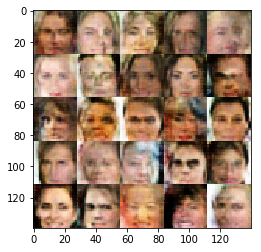

Epochs 1,batches 2410, dis_loss 1.791412353515625 , gen_loss 0.3075343668460846
Epochs 1,batches 2420, dis_loss 1.4847476482391357 , gen_loss 0.4230582118034363
Epochs 1,batches 2430, dis_loss 0.9364389181137085 , gen_loss 0.9074181318283081
Epochs 1,batches 2440, dis_loss 1.41160249710083 , gen_loss 1.1551094055175781
Epochs 1,batches 2450, dis_loss 1.731868028640747 , gen_loss 0.3102900981903076
Epochs 1,batches 2460, dis_loss 1.261266827583313 , gen_loss 0.7971965074539185
Epochs 1,batches 2470, dis_loss 1.5831230878829956 , gen_loss 0.5204194188117981
Epochs 1,batches 2480, dis_loss 0.8708623051643372 , gen_loss 0.9575209617614746
Epochs 1,batches 2490, dis_loss 1.716995120048523 , gen_loss 2.843777656555176
Epochs 1,batches 2500, dis_loss 1.1872100830078125 , gen_loss 0.6803114414215088
Tensor("generator_26/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_26/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_26/conv2d_transpose_2/BiasAdd:0", s

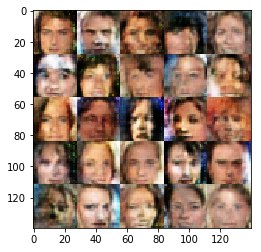

Epochs 1,batches 2510, dis_loss 1.028623342514038 , gen_loss 1.2806628942489624
Epochs 1,batches 2520, dis_loss 1.225374698638916 , gen_loss 0.9597394466400146
Epochs 1,batches 2530, dis_loss 1.2657753229141235 , gen_loss 0.6083545684814453
Epochs 1,batches 2540, dis_loss 1.1633050441741943 , gen_loss 0.8625051379203796
Epochs 1,batches 2550, dis_loss 1.4595941305160522 , gen_loss 0.44690629839897156
Epochs 1,batches 2560, dis_loss 1.459488868713379 , gen_loss 0.4954293370246887
Epochs 1,batches 2570, dis_loss 0.8516539335250854 , gen_loss 0.9742533564567566
Epochs 1,batches 2580, dis_loss 1.2599200010299683 , gen_loss 0.5649168491363525
Epochs 1,batches 2590, dis_loss 1.1866450309753418 , gen_loss 1.0008147954940796
Epochs 1,batches 2600, dis_loss 1.2248364686965942 , gen_loss 0.7171041965484619
Tensor("generator_27/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_27/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_27/conv2d_transpose_2/BiasAdd:

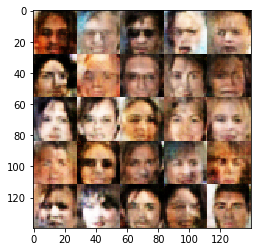

Epochs 1,batches 2610, dis_loss 1.1136105060577393 , gen_loss 1.0114511251449585
Epochs 1,batches 2620, dis_loss 1.2978312969207764 , gen_loss 0.6649242043495178
Epochs 1,batches 2630, dis_loss 1.7415685653686523 , gen_loss 0.3614124655723572
Epochs 1,batches 2640, dis_loss 1.1936218738555908 , gen_loss 0.9109412431716919
Epochs 1,batches 2650, dis_loss 1.6308308839797974 , gen_loss 0.4078330993652344
Epochs 1,batches 2660, dis_loss 1.062959909439087 , gen_loss 0.7702966928482056
Epochs 1,batches 2670, dis_loss 1.7771413326263428 , gen_loss 0.3405526876449585
Epochs 1,batches 2680, dis_loss 1.5902645587921143 , gen_loss 2.0445806980133057
Epochs 1,batches 2690, dis_loss 1.5616025924682617 , gen_loss 0.41371190547943115
Epochs 1,batches 2700, dis_loss 0.9604066014289856 , gen_loss 1.2716871500015259
Tensor("generator_28/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_28/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_28/conv2d_transpose_2/BiasAd

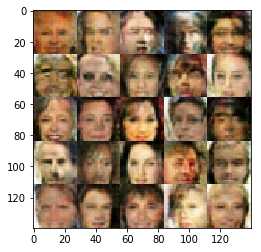

Epochs 1,batches 2710, dis_loss 0.8016771078109741 , gen_loss 1.1168150901794434
Epochs 1,batches 2720, dis_loss 1.186535120010376 , gen_loss 0.6917871236801147
Epochs 1,batches 2730, dis_loss 1.1185630559921265 , gen_loss 0.7362503409385681
Epochs 1,batches 2740, dis_loss 2.064120054244995 , gen_loss 0.2371034324169159
Epochs 1,batches 2750, dis_loss 1.4239906072616577 , gen_loss 0.4432268738746643
Epochs 1,batches 2760, dis_loss 1.2770330905914307 , gen_loss 0.6336994171142578
Epochs 1,batches 2770, dis_loss 1.0832276344299316 , gen_loss 0.805558443069458
Epochs 1,batches 2780, dis_loss 1.210547685623169 , gen_loss 0.6535769701004028
Epochs 1,batches 2790, dis_loss 1.2093971967697144 , gen_loss 1.0272629261016846
Epochs 1,batches 2800, dis_loss 1.1459358930587769 , gen_loss 1.002671718597412
Tensor("generator_29/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_29/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_29/conv2d_transpose_2/BiasAdd:0",

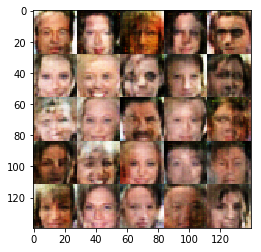

Epochs 1,batches 2810, dis_loss 0.7727113962173462 , gen_loss 1.177376389503479
Epochs 1,batches 2820, dis_loss 1.088838815689087 , gen_loss 0.7655261754989624
Epochs 1,batches 2830, dis_loss 1.6507176160812378 , gen_loss 0.350507915019989
Epochs 1,batches 2840, dis_loss 1.7660517692565918 , gen_loss 0.30137377977371216
Epochs 1,batches 2850, dis_loss 1.5820239782333374 , gen_loss 0.37251579761505127
Epochs 1,batches 2860, dis_loss 1.365053415298462 , gen_loss 0.6266381740570068
Epochs 1,batches 2870, dis_loss 1.6614367961883545 , gen_loss 0.36394059658050537
Epochs 1,batches 2880, dis_loss 1.9789918661117554 , gen_loss 0.2590453028678894
Epochs 1,batches 2890, dis_loss 1.3275128602981567 , gen_loss 0.6286827325820923
Epochs 1,batches 2900, dis_loss 2.710310935974121 , gen_loss 0.11225486546754837
Tensor("generator_30/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_30/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_30/conv2d_transpose_2/BiasAdd

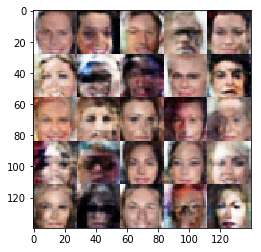

Epochs 1,batches 2910, dis_loss 1.2253214120864868 , gen_loss 0.9494913816452026
Epochs 1,batches 2920, dis_loss 1.5740456581115723 , gen_loss 0.41976791620254517
Epochs 1,batches 2930, dis_loss 1.1068756580352783 , gen_loss 0.8447927832603455
Epochs 1,batches 2940, dis_loss 1.6005463600158691 , gen_loss 0.3606308102607727
Epochs 1,batches 2950, dis_loss 1.2217954397201538 , gen_loss 0.7409266829490662
Epochs 1,batches 2960, dis_loss 1.023787021636963 , gen_loss 0.8979979157447815
Epochs 1,batches 2970, dis_loss 1.645225167274475 , gen_loss 0.36029696464538574
Epochs 1,batches 2980, dis_loss 0.8414976596832275 , gen_loss 1.3740029335021973
Epochs 1,batches 2990, dis_loss 1.6140296459197998 , gen_loss 0.41152119636535645
Epochs 1,batches 3000, dis_loss 1.328754186630249 , gen_loss 1.03920578956604
Tensor("generator_31/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_31/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_31/conv2d_transpose_2/BiasAdd:

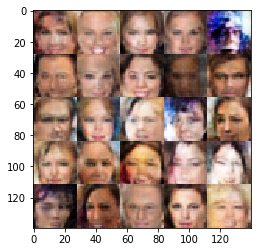

Epochs 1,batches 3010, dis_loss 1.5340721607208252 , gen_loss 0.4319756329059601
Epochs 1,batches 3020, dis_loss 1.4724199771881104 , gen_loss 0.5930067300796509
Epochs 1,batches 3030, dis_loss 1.5053801536560059 , gen_loss 0.41244369745254517
Epochs 1,batches 3040, dis_loss 1.453656792640686 , gen_loss 0.4568052291870117
Epochs 1,batches 3050, dis_loss 1.3283603191375732 , gen_loss 0.5255453586578369
Epochs 1,batches 3060, dis_loss 1.7489995956420898 , gen_loss 0.33581069111824036
Epochs 1,batches 3070, dis_loss 0.6677922606468201 , gen_loss 2.009660243988037
Epochs 1,batches 3080, dis_loss 2.1119933128356934 , gen_loss 0.21702593564987183
Epochs 1,batches 3090, dis_loss 1.4194022417068481 , gen_loss 0.49554768204689026
Epochs 1,batches 3100, dis_loss 1.1112340688705444 , gen_loss 0.9639228582382202
Tensor("generator_32/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_32/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_32/conv2d_transpose_2/Bias

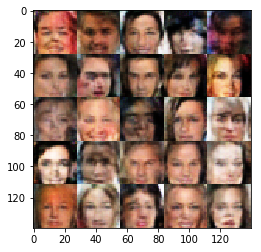

Epochs 1,batches 3110, dis_loss 1.1813117265701294 , gen_loss 0.7590638995170593
Epochs 1,batches 3120, dis_loss 1.3933284282684326 , gen_loss 0.5772104263305664
Epochs 1,batches 3130, dis_loss 1.2662155628204346 , gen_loss 0.6568570733070374
Epochs 1,batches 3140, dis_loss 0.9743467569351196 , gen_loss 1.0907914638519287
Epochs 1,batches 3150, dis_loss 0.6068164110183716 , gen_loss 2.0445594787597656
Epochs 1,batches 3160, dis_loss 1.7078605890274048 , gen_loss 0.4343927204608917
Epochs 1,batches 3170, dis_loss 1.6389378309249878 , gen_loss 0.35817623138427734
Epochs 1,batches 3180, dis_loss 1.1685245037078857 , gen_loss 0.994353175163269
Epochs 1,batches 3190, dis_loss 1.5725467205047607 , gen_loss 0.3843167722225189
Epochs 1,batches 3200, dis_loss 1.2619282007217407 , gen_loss 1.1319458484649658
Tensor("generator_33/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_33/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_33/conv2d_transpose_2/BiasAd

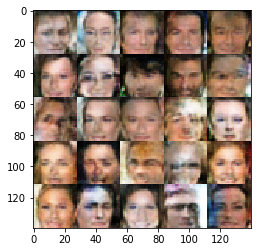

Epochs 1,batches 3210, dis_loss 1.329943060874939 , gen_loss 0.5557798147201538
Epochs 1,batches 3220, dis_loss 1.750205636024475 , gen_loss 0.29973793029785156
Epochs 1,batches 3230, dis_loss 0.9466257095336914 , gen_loss 0.9135489463806152
Epochs 1,batches 3240, dis_loss 1.2756112813949585 , gen_loss 0.7292537093162537
Epochs 1,batches 3250, dis_loss 1.3615797758102417 , gen_loss 0.560139536857605
Epochs 1,batches 3260, dis_loss 1.4717754125595093 , gen_loss 0.46372517943382263
Epochs 1,batches 3270, dis_loss 1.8551149368286133 , gen_loss 0.30347609519958496
Epochs 1,batches 3280, dis_loss 1.029311180114746 , gen_loss 1.409536361694336
Epochs 1,batches 3290, dis_loss 0.8759797811508179 , gen_loss 2.0877420902252197
Epochs 1,batches 3300, dis_loss 1.590200662612915 , gen_loss 1.894022822380066
Tensor("generator_34/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_34/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_34/conv2d_transpose_2/BiasAdd:0"

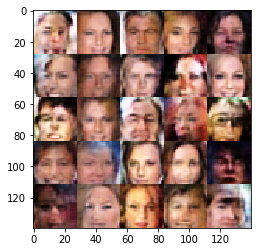

Epochs 1,batches 3310, dis_loss 1.947039008140564 , gen_loss 2.6872220039367676
Epochs 1,batches 3320, dis_loss 0.855194091796875 , gen_loss 1.4119367599487305
Epochs 1,batches 3330, dis_loss 1.293056607246399 , gen_loss 0.9813709855079651
Epochs 1,batches 3340, dis_loss 1.325799822807312 , gen_loss 0.606785774230957
Epochs 1,batches 3350, dis_loss 1.9105225801467896 , gen_loss 0.28032591938972473
Epochs 1,batches 3360, dis_loss 1.5983631610870361 , gen_loss 0.3648310899734497
Epochs 1,batches 3370, dis_loss 1.5933401584625244 , gen_loss 0.455230176448822
Epochs 1,batches 3380, dis_loss 2.4549858570098877 , gen_loss 0.204564169049263
Epochs 1,batches 3390, dis_loss 1.3472106456756592 , gen_loss 0.5401721596717834
Epochs 1,batches 3400, dis_loss 1.4510164260864258 , gen_loss 0.48830538988113403
Tensor("generator_35/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_35/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_35/conv2d_transpose_2/BiasAdd:0",

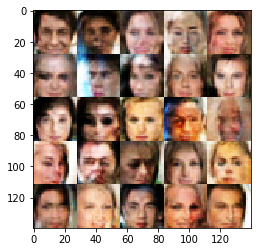

Epochs 1,batches 3410, dis_loss 1.0223417282104492 , gen_loss 1.4274508953094482
Epochs 1,batches 3420, dis_loss 1.54241943359375 , gen_loss 0.4290614128112793
Epochs 1,batches 3430, dis_loss 1.6275107860565186 , gen_loss 0.4177114963531494
Epochs 1,batches 3440, dis_loss 1.4489952325820923 , gen_loss 0.48037102818489075
Epochs 1,batches 3450, dis_loss 1.4975289106369019 , gen_loss 0.41969141364097595
Epochs 1,batches 3460, dis_loss 1.3072272539138794 , gen_loss 0.5356464982032776
Epochs 1,batches 3470, dis_loss 1.0817270278930664 , gen_loss 1.3699742555618286
Epochs 1,batches 3480, dis_loss 1.0208953619003296 , gen_loss 4.827747344970703
Epochs 1,batches 3490, dis_loss 2.0933027267456055 , gen_loss 0.22070512175559998
Epochs 1,batches 3500, dis_loss 0.9725779294967651 , gen_loss 0.9815126657485962
Tensor("generator_36/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_36/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_36/conv2d_transpose_2/BiasAd

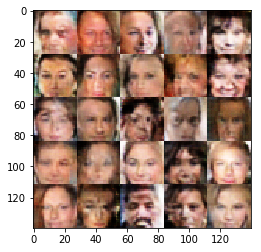

Epochs 1,batches 3510, dis_loss 1.6007659435272217 , gen_loss 0.43290507793426514
Epochs 1,batches 3520, dis_loss 2.440643310546875 , gen_loss 0.1550787091255188
Epochs 1,batches 3530, dis_loss 1.2311931848526 , gen_loss 0.7739158868789673
Epochs 1,batches 3540, dis_loss 1.2850443124771118 , gen_loss 0.611653745174408
Epochs 1,batches 3550, dis_loss 1.3213772773742676 , gen_loss 0.6759899854660034
Epochs 1,batches 3560, dis_loss 1.1229878664016724 , gen_loss 0.8697584867477417
Epochs 1,batches 3570, dis_loss 1.488930344581604 , gen_loss 0.47617894411087036
Epochs 1,batches 3580, dis_loss 1.2267608642578125 , gen_loss 0.8068504333496094
Epochs 1,batches 3590, dis_loss 1.4745407104492188 , gen_loss 0.49569618701934814
Epochs 1,batches 3600, dis_loss 0.6585666537284851 , gen_loss 2.3335139751434326
Tensor("generator_37/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_37/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_37/conv2d_transpose_2/BiasAdd:0

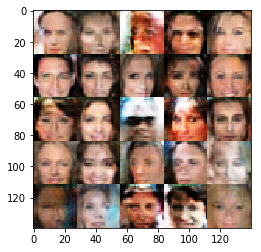

Epochs 1,batches 3610, dis_loss 1.8592896461486816 , gen_loss 0.3650171756744385
Epochs 1,batches 3620, dis_loss 0.7296640276908875 , gen_loss 1.3204407691955566
Epochs 1,batches 3630, dis_loss 1.1573394536972046 , gen_loss 0.8627986907958984
Epochs 1,batches 3640, dis_loss 1.2913539409637451 , gen_loss 0.6921471357345581
Epochs 1,batches 3650, dis_loss 1.6785252094268799 , gen_loss 0.33144140243530273
Epochs 1,batches 3660, dis_loss 1.1424281597137451 , gen_loss 0.7177114486694336
Epochs 1,batches 3670, dis_loss 1.7274510860443115 , gen_loss 0.3624604642391205
Epochs 1,batches 3680, dis_loss 1.6907843351364136 , gen_loss 0.3547753095626831
Epochs 1,batches 3690, dis_loss 1.1113739013671875 , gen_loss 0.8805945515632629
Epochs 1,batches 3700, dis_loss 1.0531474351882935 , gen_loss 0.7553538084030151
Tensor("generator_38/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_38/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_38/conv2d_transpose_2/BiasA

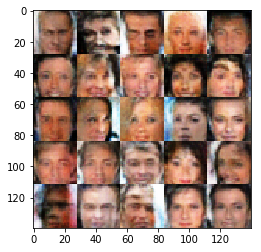

Epochs 1,batches 3710, dis_loss 1.3268544673919678 , gen_loss 0.5582071542739868
Epochs 1,batches 3720, dis_loss 1.5679874420166016 , gen_loss 0.3958495259284973
Epochs 1,batches 3730, dis_loss 1.0156278610229492 , gen_loss 1.2597863674163818
Epochs 1,batches 3740, dis_loss 1.344686508178711 , gen_loss 0.5638114809989929
Epochs 1,batches 3750, dis_loss 1.2551753520965576 , gen_loss 0.7650116086006165
Epochs 1,batches 3760, dis_loss 1.9679787158966064 , gen_loss 0.2545008659362793
Epochs 1,batches 3770, dis_loss 0.9792784452438354 , gen_loss 3.1213765144348145
Epochs 1,batches 3780, dis_loss 0.5653903484344482 , gen_loss 1.7171218395233154
Epochs 1,batches 3790, dis_loss 1.4103535413742065 , gen_loss 0.5362541675567627
Epochs 1,batches 3800, dis_loss 2.27058744430542 , gen_loss 0.1852070391178131
Tensor("generator_39/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_39/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_39/conv2d_transpose_2/BiasAdd:0

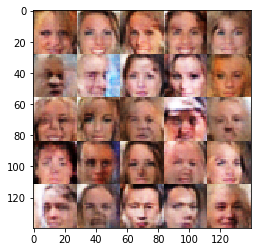

Epochs 1,batches 3810, dis_loss 2.0375945568084717 , gen_loss 0.21968257427215576
Epochs 1,batches 3820, dis_loss 2.13765811920166 , gen_loss 0.2043146938085556
Epochs 1,batches 3830, dis_loss 1.4808074235916138 , gen_loss 0.43337929248809814
Epochs 1,batches 3840, dis_loss 1.4407309293746948 , gen_loss 0.5712823867797852
Epochs 1,batches 3850, dis_loss 1.5027494430541992 , gen_loss 0.43822577595710754
Epochs 1,batches 3860, dis_loss 1.0685514211654663 , gen_loss 0.7270305752754211
Epochs 1,batches 3870, dis_loss 0.7310250401496887 , gen_loss 1.4498566389083862
Epochs 1,batches 3880, dis_loss 1.3001174926757812 , gen_loss 0.5960321426391602
Epochs 1,batches 3890, dis_loss 1.2244091033935547 , gen_loss 0.6148399710655212
Epochs 1,batches 3900, dis_loss 1.2816407680511475 , gen_loss 0.9133580923080444
Tensor("generator_40/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_40/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_40/conv2d_transpose_2/BiasA

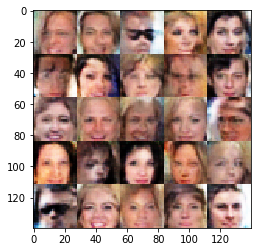

Epochs 1,batches 3910, dis_loss 0.7955049276351929 , gen_loss 1.4529874324798584
Epochs 1,batches 3920, dis_loss 1.699331521987915 , gen_loss 0.34389010071754456
Epochs 1,batches 3930, dis_loss 1.270550012588501 , gen_loss 0.5737572908401489
Epochs 1,batches 3940, dis_loss 0.5936854481697083 , gen_loss 1.7694447040557861
Epochs 1,batches 3950, dis_loss 1.126979112625122 , gen_loss 1.1440746784210205
Epochs 1,batches 3960, dis_loss 1.7258970737457275 , gen_loss 0.3777697682380676
Epochs 1,batches 3970, dis_loss 0.8475779294967651 , gen_loss 1.0733416080474854
Epochs 1,batches 3980, dis_loss 1.1224255561828613 , gen_loss 0.985718846321106
Epochs 1,batches 3990, dis_loss 1.9866966009140015 , gen_loss 0.2617143988609314
Epochs 1,batches 4000, dis_loss 1.77163565158844 , gen_loss 0.31653478741645813
Tensor("generator_41/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_41/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_41/conv2d_transpose_2/BiasAdd:0"

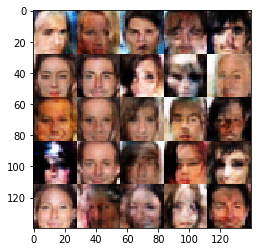

Epochs 1,batches 4010, dis_loss 2.390956401824951 , gen_loss 0.1690053641796112
Epochs 1,batches 4020, dis_loss 0.7820234298706055 , gen_loss 1.6410281658172607
Epochs 1,batches 4030, dis_loss 1.1346015930175781 , gen_loss 1.076978325843811
Epochs 1,batches 4040, dis_loss 0.8784559965133667 , gen_loss 1.0466175079345703
Epochs 1,batches 4050, dis_loss 0.8671294450759888 , gen_loss 1.1949394941329956
Epochs 1,batches 4060, dis_loss 1.771398901939392 , gen_loss 0.3000643849372864
Epochs 1,batches 4070, dis_loss 1.1977288722991943 , gen_loss 0.7073333263397217
Epochs 1,batches 4080, dis_loss 1.0887303352355957 , gen_loss 1.1775139570236206
Epochs 1,batches 4090, dis_loss 1.0994478464126587 , gen_loss 0.7066397666931152
Epochs 1,batches 4100, dis_loss 1.020032286643982 , gen_loss 0.8329517841339111
Tensor("generator_42/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_42/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_42/conv2d_transpose_2/BiasAdd:0"

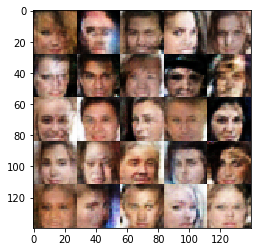

Epochs 1,batches 4110, dis_loss 0.9540906548500061 , gen_loss 1.0289422273635864
Epochs 1,batches 4120, dis_loss 1.8150708675384521 , gen_loss 0.285460501909256
Epochs 1,batches 4130, dis_loss 2.2441227436065674 , gen_loss 0.18889272212982178
Epochs 1,batches 4140, dis_loss 1.3211162090301514 , gen_loss 0.6840919256210327
Epochs 1,batches 4150, dis_loss 1.1080445051193237 , gen_loss 0.7115289568901062
Epochs 1,batches 4160, dis_loss 0.8398295640945435 , gen_loss 1.0702143907546997
Epochs 1,batches 4170, dis_loss 0.9315067529678345 , gen_loss 1.834559440612793
Epochs 1,batches 4180, dis_loss 1.5555095672607422 , gen_loss 0.3804393708705902
Epochs 1,batches 4190, dis_loss 1.813876748085022 , gen_loss 0.2897408604621887
Epochs 1,batches 4200, dis_loss 1.4689284563064575 , gen_loss 0.4401932954788208
Tensor("generator_43/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_43/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_43/conv2d_transpose_2/BiasAdd:

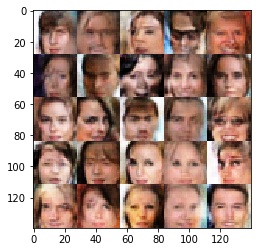

Epochs 1,batches 4210, dis_loss 1.350059151649475 , gen_loss 0.5224526524543762
Epochs 1,batches 4220, dis_loss 1.424551248550415 , gen_loss 1.3645508289337158
Epochs 1,batches 4230, dis_loss 1.3847095966339111 , gen_loss 2.3091788291931152
Epochs 1,batches 4240, dis_loss 1.0563533306121826 , gen_loss 0.9620354175567627
Epochs 1,batches 4250, dis_loss 0.7181387543678284 , gen_loss 1.441807508468628
Epochs 1,batches 4260, dis_loss 2.7361645698547363 , gen_loss 2.803898334503174
Epochs 1,batches 4270, dis_loss 1.235539436340332 , gen_loss 0.7301790714263916
Epochs 1,batches 4280, dis_loss 1.5780022144317627 , gen_loss 0.37325751781463623
Epochs 1,batches 4290, dis_loss 0.801577091217041 , gen_loss 1.3750323057174683
Epochs 1,batches 4300, dis_loss 0.55535888671875 , gen_loss 1.985780119895935
Tensor("generator_44/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_44/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_44/conv2d_transpose_2/BiasAdd:0", sh

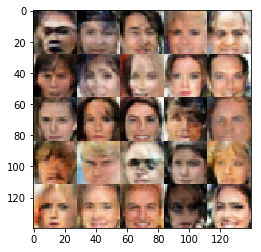

Epochs 1,batches 4310, dis_loss 1.5105022192001343 , gen_loss 1.0387526750564575
Epochs 1,batches 4320, dis_loss 2.3436176776885986 , gen_loss 0.17666535079479218
Epochs 1,batches 4330, dis_loss 1.3255974054336548 , gen_loss 0.613616406917572
Epochs 1,batches 4340, dis_loss 1.1999849081039429 , gen_loss 0.8474380970001221
Epochs 1,batches 4350, dis_loss 1.6042256355285645 , gen_loss 0.48567068576812744
Epochs 1,batches 4360, dis_loss 1.2657396793365479 , gen_loss 0.5944209098815918
Epochs 1,batches 4370, dis_loss 1.3908405303955078 , gen_loss 0.5729424357414246
Epochs 1,batches 4380, dis_loss 0.7093583345413208 , gen_loss 1.4025568962097168
Epochs 1,batches 4390, dis_loss 0.9099173545837402 , gen_loss 1.2180315256118774
Epochs 1,batches 4400, dis_loss 1.5689152479171753 , gen_loss 0.3924613893032074
Tensor("generator_45/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_45/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_45/conv2d_transpose_2/BiasA

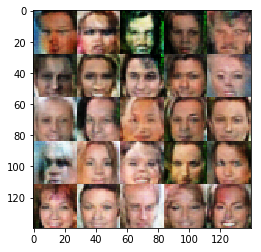

Epochs 1,batches 4410, dis_loss 1.1780287027359009 , gen_loss 0.6861594319343567
Epochs 1,batches 4420, dis_loss 0.8022922277450562 , gen_loss 1.1893112659454346
Epochs 1,batches 4430, dis_loss 0.5335856676101685 , gen_loss 2.26204252243042
Epochs 1,batches 4440, dis_loss 1.7296223640441895 , gen_loss 0.37424319982528687
Epochs 1,batches 4450, dis_loss 1.1159111261367798 , gen_loss 0.7347334623336792
Epochs 1,batches 4460, dis_loss 1.4852901697158813 , gen_loss 0.4823536276817322
Epochs 1,batches 4470, dis_loss 1.4247573614120483 , gen_loss 0.4325793385505676
Epochs 1,batches 4480, dis_loss 2.664121627807617 , gen_loss 0.13333259522914886
Epochs 1,batches 4490, dis_loss 2.333751678466797 , gen_loss 0.1882791519165039
Epochs 1,batches 4500, dis_loss 1.2139623165130615 , gen_loss 0.5956869125366211
Tensor("generator_46/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_46/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_46/conv2d_transpose_2/BiasAdd:

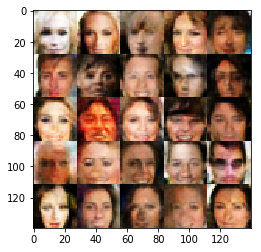

Epochs 1,batches 4510, dis_loss 1.3686988353729248 , gen_loss 0.5941351652145386
Epochs 1,batches 4520, dis_loss 1.174818992614746 , gen_loss 1.1672742366790771
Epochs 1,batches 4530, dis_loss 1.5483890771865845 , gen_loss 0.4441852271556854
Epochs 1,batches 4540, dis_loss 1.7598164081573486 , gen_loss 0.29875022172927856
Epochs 1,batches 4550, dis_loss 1.0057647228240967 , gen_loss 0.847346842288971
Epochs 1,batches 4560, dis_loss 0.7774741649627686 , gen_loss 1.3503085374832153
Epochs 1,batches 4570, dis_loss 1.1866368055343628 , gen_loss 0.6910594701766968
Epochs 1,batches 4580, dis_loss 0.746094286441803 , gen_loss 1.2450922727584839
Epochs 1,batches 4590, dis_loss 1.1692739725112915 , gen_loss 2.210836172103882
Epochs 1,batches 4600, dis_loss 0.9960180521011353 , gen_loss 1.3871005773544312
Tensor("generator_47/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_47/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_47/conv2d_transpose_2/BiasAdd:0

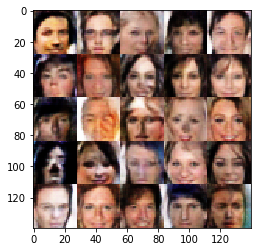

Epochs 1,batches 4610, dis_loss 1.9762619733810425 , gen_loss 0.252116858959198
Epochs 1,batches 4620, dis_loss 1.2001242637634277 , gen_loss 0.6631535887718201
Epochs 1,batches 4630, dis_loss 1.385500192642212 , gen_loss 0.5223535299301147
Epochs 1,batches 4640, dis_loss 1.3032352924346924 , gen_loss 0.5430338978767395
Epochs 1,batches 4650, dis_loss 1.4968738555908203 , gen_loss 0.4315405786037445
Epochs 1,batches 4660, dis_loss 1.3892556428909302 , gen_loss 0.6240081787109375
Epochs 1,batches 4670, dis_loss 0.9037415385246277 , gen_loss 0.9094188213348389
Epochs 1,batches 4680, dis_loss 1.953953742980957 , gen_loss 0.28500616550445557
Epochs 1,batches 4690, dis_loss 1.3484315872192383 , gen_loss 0.5737185478210449
Epochs 1,batches 4700, dis_loss 1.266711950302124 , gen_loss 1.5108015537261963
Tensor("generator_48/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_48/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_48/conv2d_transpose_2/BiasAdd:0

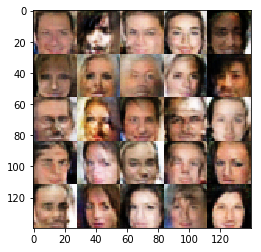

Epochs 1,batches 4710, dis_loss 1.3550078868865967 , gen_loss 0.5705052614212036
Epochs 1,batches 4720, dis_loss 1.3982774019241333 , gen_loss 0.48920950293540955
Epochs 1,batches 4730, dis_loss 0.9759580492973328 , gen_loss 1.6105165481567383
Epochs 1,batches 4740, dis_loss 1.0537747144699097 , gen_loss 0.951400101184845
Epochs 1,batches 4750, dis_loss 1.0888173580169678 , gen_loss 0.9908959269523621
Epochs 1,batches 4760, dis_loss 1.4111968278884888 , gen_loss 0.5130658149719238
Epochs 1,batches 4770, dis_loss 1.2709356546401978 , gen_loss 0.6520990133285522
Epochs 1,batches 4780, dis_loss 1.3301143646240234 , gen_loss 0.5274024605751038
Epochs 1,batches 4790, dis_loss 1.084533452987671 , gen_loss 0.861375629901886
Epochs 1,batches 4800, dis_loss 1.3555541038513184 , gen_loss 0.5011353492736816
Tensor("generator_49/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_49/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_49/conv2d_transpose_2/BiasAdd:

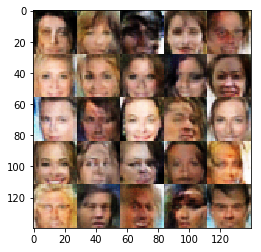

Epochs 1,batches 4810, dis_loss 1.9528412818908691 , gen_loss 0.26943671703338623
Epochs 1,batches 4820, dis_loss 1.4958927631378174 , gen_loss 1.8339290618896484
Epochs 1,batches 4830, dis_loss 2.6887996196746826 , gen_loss 0.13512739539146423
Epochs 1,batches 4840, dis_loss 1.970018982887268 , gen_loss 0.259807288646698
Epochs 1,batches 4850, dis_loss 0.886744499206543 , gen_loss 1.0334134101867676
Epochs 1,batches 4860, dis_loss 1.7387360334396362 , gen_loss 0.34690502285957336
Epochs 1,batches 4870, dis_loss 0.48836612701416016 , gen_loss 2.299091100692749
Epochs 1,batches 4880, dis_loss 1.2768746614456177 , gen_loss 0.5953456163406372
Epochs 1,batches 4890, dis_loss 1.4764714241027832 , gen_loss 0.45260506868362427
Epochs 1,batches 4900, dis_loss 1.2380139827728271 , gen_loss 0.6488268375396729
Tensor("generator_50/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_50/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_50/conv2d_transpose_2/BiasA

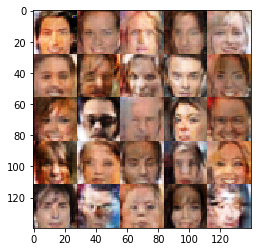

Epochs 1,batches 4910, dis_loss 1.4559801816940308 , gen_loss 0.4764895439147949
Epochs 1,batches 4920, dis_loss 1.263136625289917 , gen_loss 0.601334273815155
Epochs 1,batches 4930, dis_loss 0.96856290102005 , gen_loss 0.8223646879196167
Epochs 1,batches 4940, dis_loss 1.242741346359253 , gen_loss 0.6960746049880981
Epochs 1,batches 4950, dis_loss 1.4007244110107422 , gen_loss 0.5391454696655273
Epochs 1,batches 4960, dis_loss 1.4575932025909424 , gen_loss 0.5175150632858276
Epochs 1,batches 4970, dis_loss 1.4962389469146729 , gen_loss 1.3943732976913452
Epochs 1,batches 4980, dis_loss 1.1448681354522705 , gen_loss 1.2076749801635742
Epochs 1,batches 4990, dis_loss 0.9680432081222534 , gen_loss 0.9768816232681274
Epochs 1,batches 5000, dis_loss 0.8905763030052185 , gen_loss 1.2831215858459473
Tensor("generator_51/Maximum:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("generator_51/Maximum_1:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("generator_51/conv2d_transpose_2/BiasAdd:0",

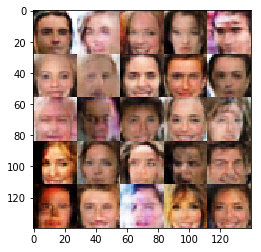

In [ ]:
batch_size = 16
z_dim = 100
learning_rate = 0.0008
beta1 = 0.35


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.